# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/data_courses_AI_ML/project_AI_ML/Loan_Modelling.csv'

In [ ]:
df=pd.read_csv(path)

## Data Overview

* Observations
* Sanity checks

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
print(f'the data has {df.shape[0]} rows and {df.shape[1]} columns')

the data has 5000 rows and 14 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### data info : There are no missing values, and all our data are integers except for CCavg, which is a float.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### the description statistics :  
- the average of age is 45 and 50% of the data aged 45 years old so the age here is normally distributed, as well as the max is 67 years old
- the average of customers experience is 20 years and the 50% of the customers has 20 years of experience wish means that the experience variable is normaly distributed
- The average income is 73k, which could be considered high compared to the income in Texas (50k). Knowing that the median is 64k, we can say that the distribution of income is slightly right-skewed
- the average family size is 2.4 with max of 4
- 75% of  CCavg have 2.5k monthly and the max is 10k
- Fifty percent of the customers have no mortgage, and the corresponding distribution is left-skewed, and the 75% have 101k and the max is 635k as a mortgage , wish mean thet this distribution have a large outliers data , this needs to be adjusted later
- most of the customers have no personal loan.
- most of the customers have no securities account.
- most of the customers have no CD_account.



# **Univariate Analysis**

In [ ]:
df.CD_Account.value_counts(normalize=True)

CD_Account
0    0.9396
1    0.0604
Name: proportion, dtype: float64

only 6% of our csutomers have a certificate of deposit (CD), wish means that those poeple have same a saving account   

In [ ]:
df.CreditCard.value_counts(normalize=True)

CreditCard
0    0.706
1    0.294
Name: proportion, dtype: float64

almost 30% have anther credit card from other banks

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

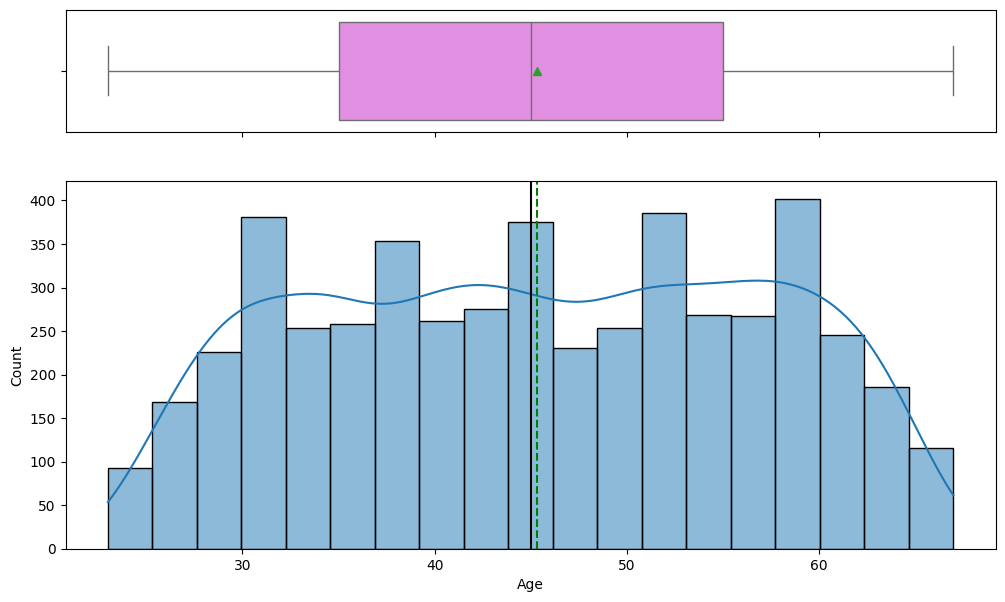

In [ ]:
histogram_boxplot(df,'Age',kde=True)

there is a high variability in the age distribution with no outliers , so the cutomers present all ages   

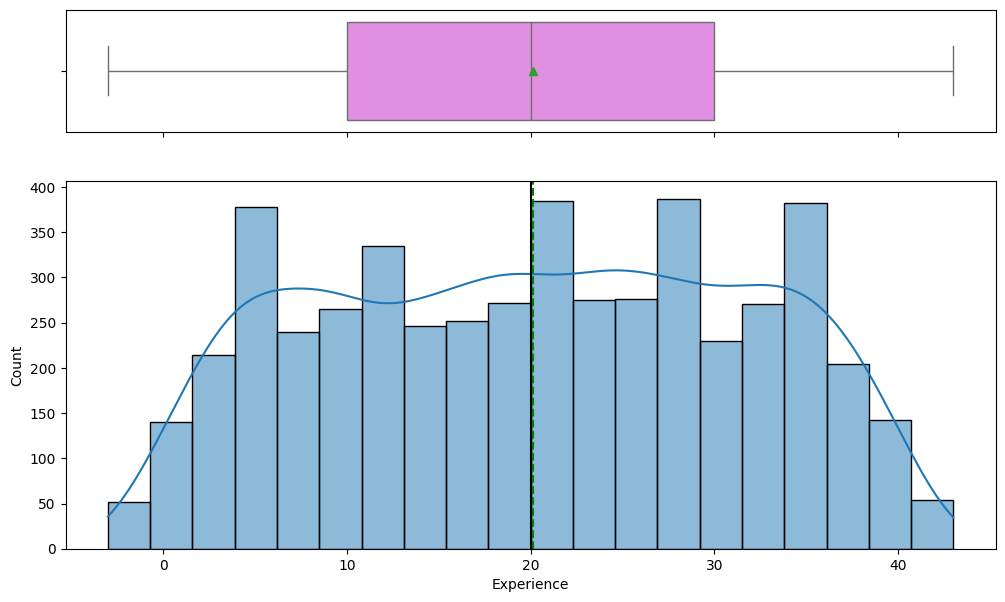

In [ ]:
histogram_boxplot(df,'Experience',kde=True)

the experience distribution also present a plateau wish means i high variability in the data and the median is 20 years of experience

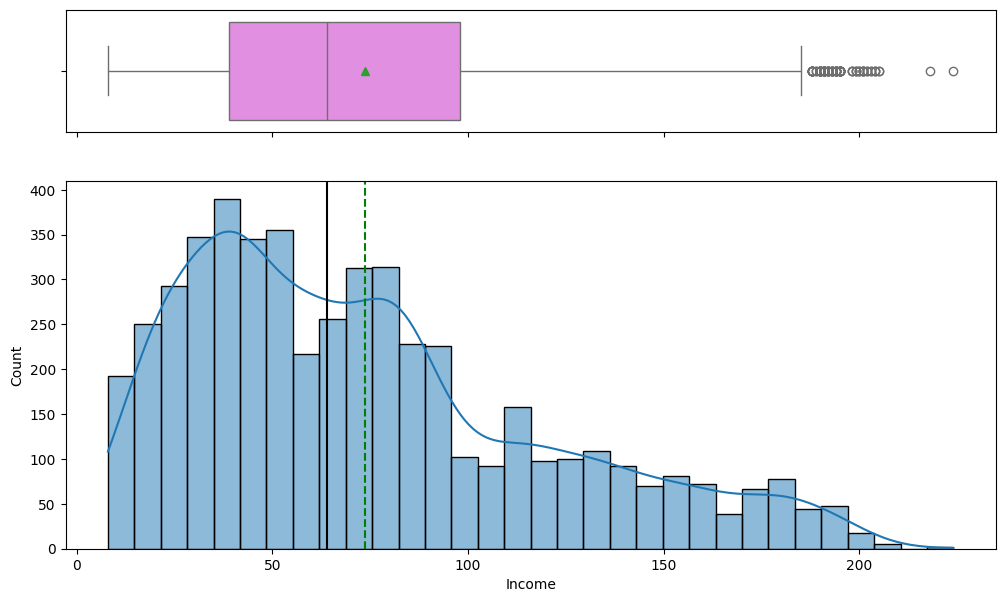

In [ ]:
histogram_boxplot(df,'Income',kde=True)

In [ ]:
df[df.Income>100]['Income'].count()

1212

the income is right skewed and shows same outliers , and 1212 cutomers make more than 100k a year, so the outliers here seems to be valubale and actually form a cluster

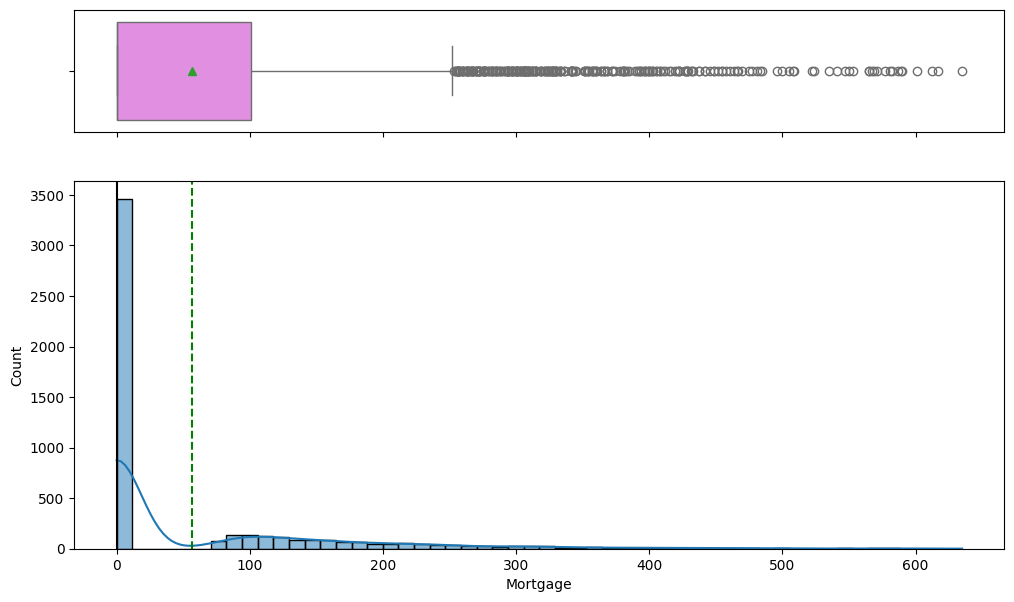

In [ ]:
histogram_boxplot(df,'Mortgage',kde=True)

In [ ]:
df[df.Mortgage==0]['Mortgage'].count()/len(df)

0.6924

In [ ]:
df[df.Mortgage < df.Mortgage.mean()]['Mortgage'].count()

3462

69% of the cutoner have no morgage , the boxplot shows more outliers.
and only 1538 from 5000 have a mortgage

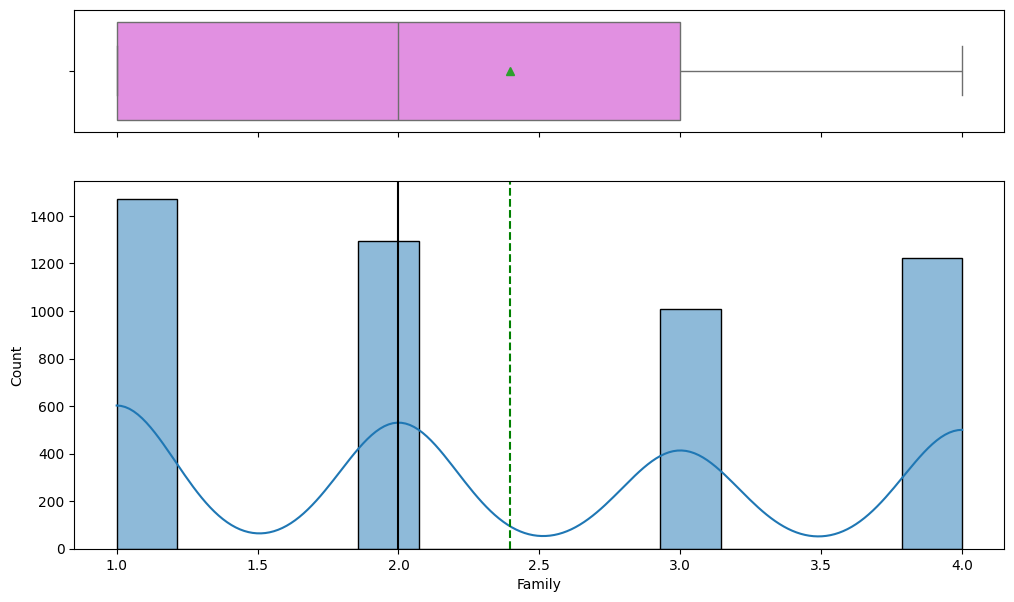

In [ ]:
histogram_boxplot(df,'Family',kde=True)

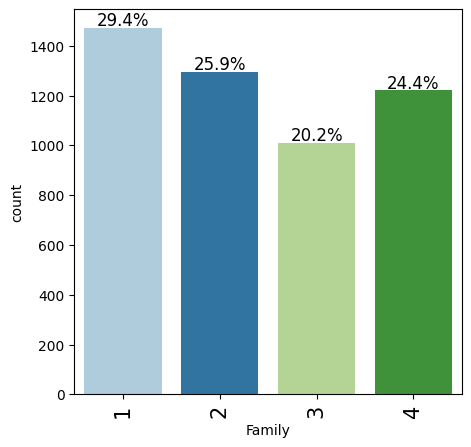

In [ ]:
labeled_barplot(df,'Family',perc=True)

29.4% of the family customers have 1 and 24.4% have 4

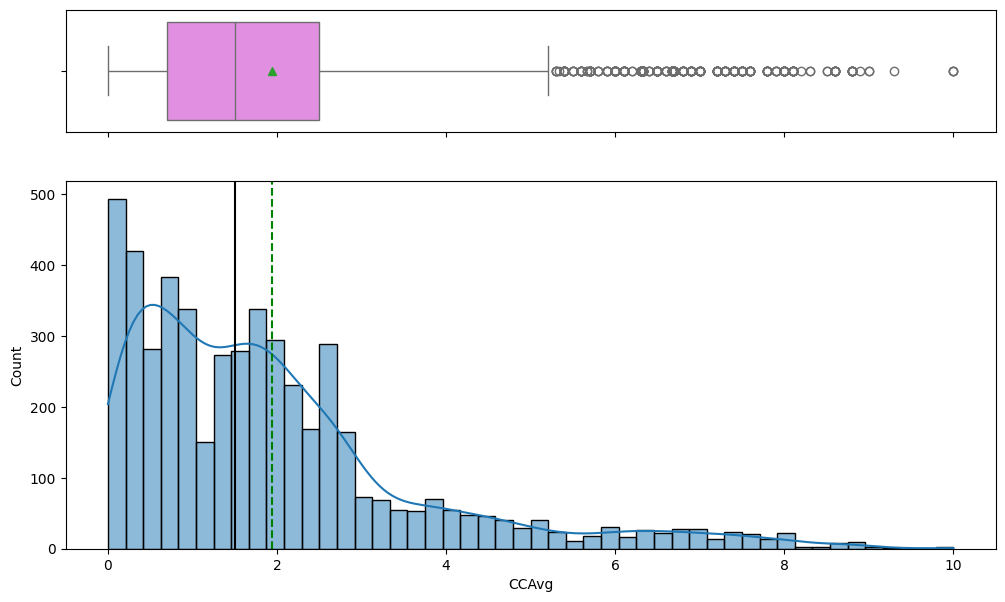

In [ ]:
histogram_boxplot(df,'CCAvg',kde=True)

The distribution of the average spending on credit cards per month (CCAvg) is right-skewed with outliers. While the mean is around $2,000 per month, these outliers are important because they represent high spenders who could be potential loan customers

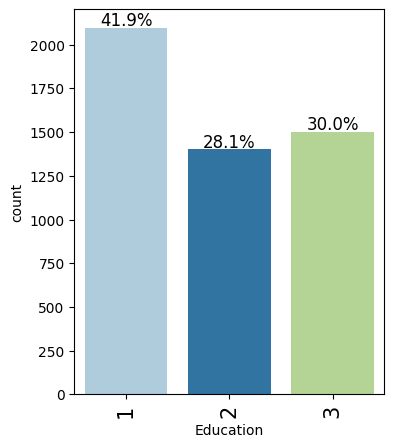

In [ ]:
labeled_barplot(df,'Education',perc=True)

Almost 42% of the customers are undergraduates, and 30% are Advanced/Professional. The rest are graduates





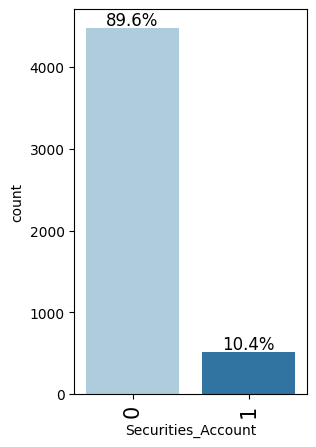

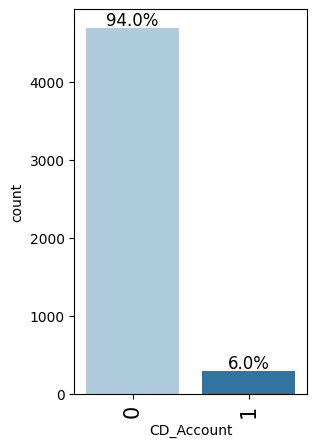

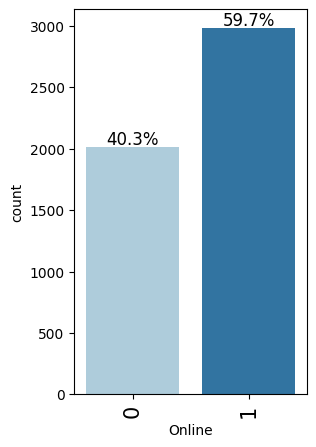

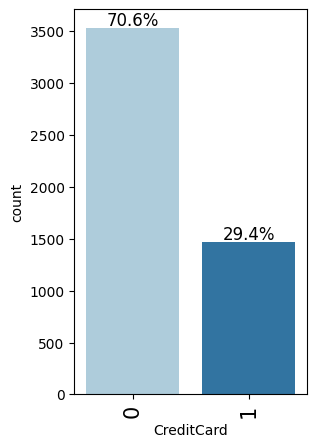

In [ ]:
cat_var=['Securities_Account',
       'CD_Account', 'Online', 'CreditCard']
for col in cat_var:
  labeled_barplot(df,col,perc=True)

- almost 90% have no securities account
- 94% of the cutemers have no CD_accounts
- almost 60% use online banking
- 70.6% havn't other credit card from anther bank

### Multivariant Analysis

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df.groupby('CreditCard')['CD_Account'].value_counts()

CreditCard  CD_Account
0           0             3468
            1               62
1           0             1230
            1              240
Name: count, dtype: int64

3468 custmer have no Credit Card and no CD_Account and 1230 that have other credit card but no CD_Account

In [ ]:
pd.DataFrame(df.groupby('CreditCard')[['CD_Account', 'Securities_Account']].value_counts())

count
CreditCard CD_Account Securities_Account       
0          0          0                    3138
                      1                     330
           1          1                      49
                      0                      13
1          0          0                    1185
           1          0                     142
                      1                      98
           0          1                      45

3138 from 5000 cutomers have no credit card, no CD_Account  and no Securities_Account too.

However, 1185 from 5000 have other credit cards but no CD_Account  and no Securities_Accoun

<Axes: >

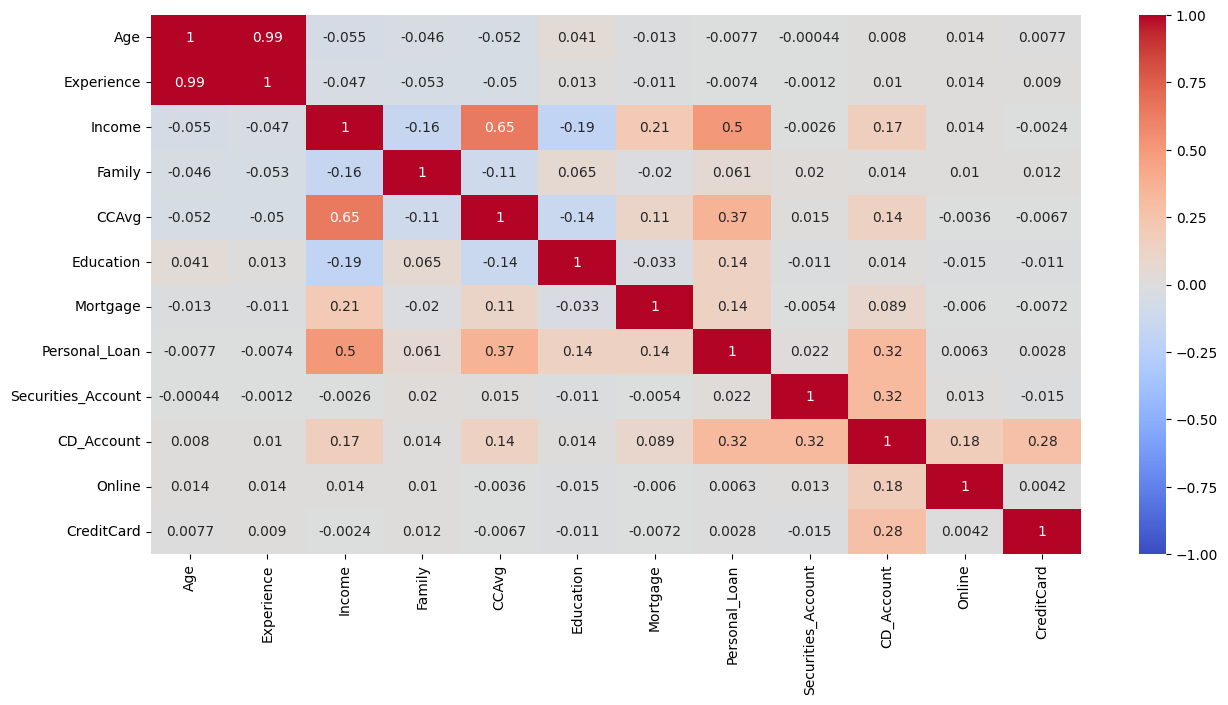

In [ ]:
plt.subplots(figsize=(15, 7))
df_col=['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'] # i drop the ID and ZIP code because they are just number that related to the cutomers or just to numerate the customers
sns.heatmap(df[df_col].corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

- the income is positively correlated with the personal loan that the cutomers take before, as well as the CD account and CCAvg
- the age and experience have strong correlation with each others
- Education and mortgage are slightly correlated with the personal loan
- CD_Account is correlated to Credit card , online, securities account, and the income

In [ ]:
df1=df.copy()

In [ ]:
df1.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

<Axes: xlabel='Personal_Loan', ylabel='Income'>

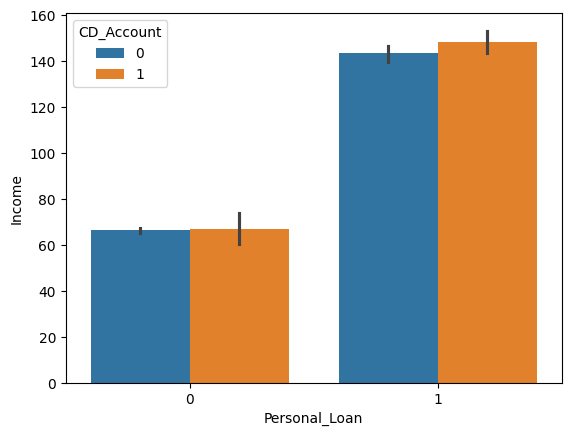

In [ ]:
sns.barplot(y='Income', x='Personal_Loan', data=df1, hue='CD_Account')

The figure shows that income influences a customer's decision to take a personal loan, while the CD account has no impact on this decision. This is evident as the number of customers with a CD account who take the loan is the same as those who do not have a CD account

<Axes: xlabel='CCAvg', ylabel='Income'>

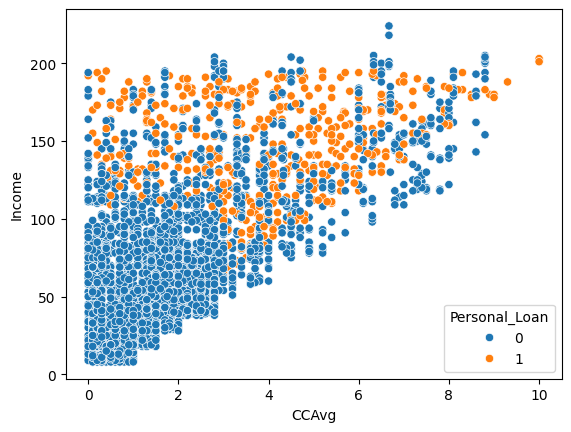

In [ ]:
sns.scatterplot(y='Income', hue='Personal_Loan', data=df1, x='CCAvg')

The more customers spend per month and the higher their income, the more likely they are to take a personal loan.

<Axes: xlabel='Experience', ylabel='Age'>

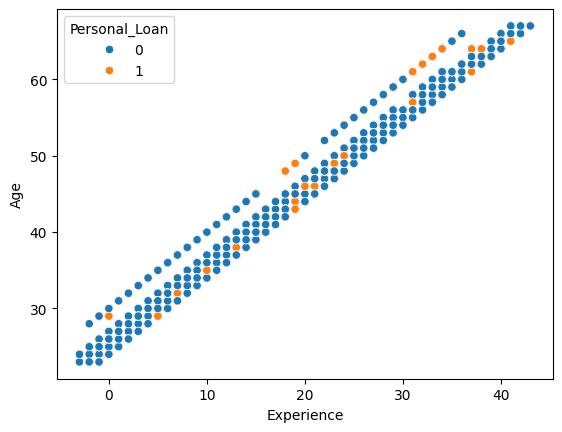

In [ ]:
sns.scatterplot(y='Age', hue='Personal_Loan', data=df1, x='Experience')

As expected, age and experience are linearly dependent, and customers with more age and experience tend to take a personal loan  

The more a customer spends on their credit card monthly, the more likely they are to take a personal loan.
Note: We don't know how much risk there is of them not repaying the loan, wish is missing variable in this data

In [ ]:
sns.pairplot(df1, hue='Personal_Loan')

Output hidden; open in https://colab.research.google.com to view.

- the ehigher education and the CCAvg of a cutomer , the more they take the loan
- the majority of the cutmer cthat have CD_ACCount take a loan
-when the mortgage and the income goes hogher the custumer takes a loan


<Axes: xlabel='Securities_Account', ylabel='count'>

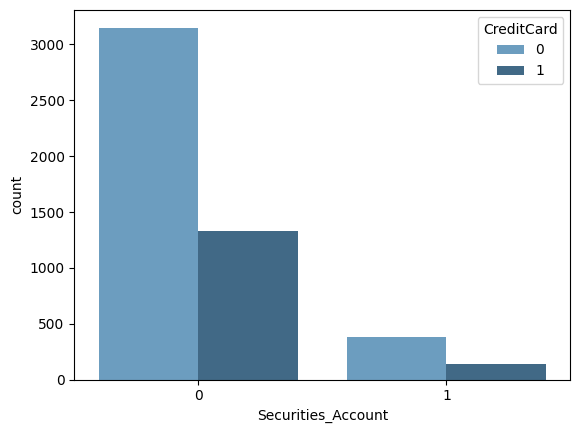

In [ ]:
sns.countplot(data=df,x='Securities_Account',hue='CreditCard', palette="Blues_d")

Customers without a securities account are also less likely to have a credit card

<Axes: xlabel='Personal_Loan', ylabel='Age'>

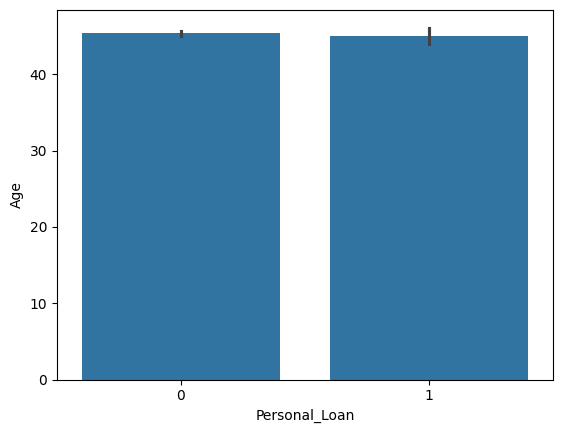

In [ ]:
sns.barplot(x='Personal_Loan', y='Age', data=df1)

it looks here like there is patterns between the age and taking loan

<Axes: xlabel='Personal_Loan', ylabel='Education'>

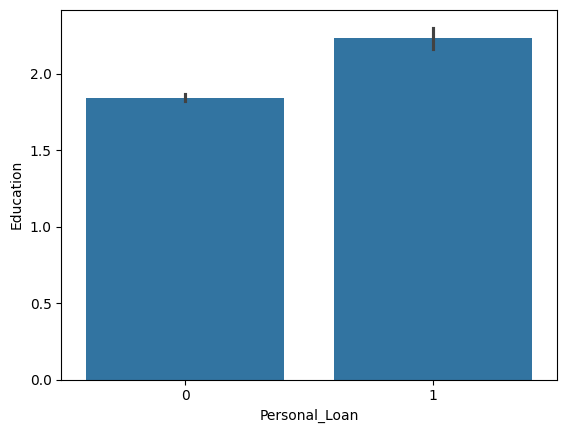

In [ ]:
sns.barplot(x='Personal_Loan', y='Education', data=df1)

While the EDA identified a weak influence of education level on loan likelihood, this factor appears to be less important within the decision tree model.

##**Conclusions**
#Customer Profiles:

Only 6% of customers have a Certificate of Deposit (CD).
Nearly 30% have credit cards from other banks.
69.36% of customers lack credit cards, CD accounts, and securities accounts.
Descriptive Statistics:

#Age:
 The average age is 45, with the oldest being 67.
Experience: Both the average and median experience is 20 years.
#Income:
 The average income is 73k the median is 64k, indicating a slight right skew.
#Family Size:
The average family size is 2.4, with a maximum of 4.
#Monthly Credit Card Spending CCAvg:
 Most customers spend up to 2.5k monthly; the maximum is 10k.
#Mortgage:
- Half of the customers have no mortgage, with the highest mortgage at 635k, showing many outliers.
- Most customers do not have personal loans, securities accounts, or CD accounts.
- 60% of customers use online banking.
- 70.6% do not have credit cards from other banks.
#Correlation Insights:

Income: Positively linked to personal loans, CD accounts, and credit card spending.
Age and Experience: Strongly correlated.
Education and Mortgage: Slightly linked to personal loans.
CD Account: Associated with credit card use, online banking, securities accounts, and income.
# Customer Behavior:

Higher credit card spending and income increase the likelihood of taking personal loans.
Older and more experienced customers are more likely to take loans.
Higher education and higher credit card spending boost loan uptake.
Customers with mortgages and higher incomes are more likely to take loans.
##**Recommendations**
#Target Marketing
Focus on customers without credit cards, CD accounts, or securities accounts.
Cross-sell to customers with credit cards from other banks.
#Product Development
Develop products for high-income and high-spending customers.
Create loan offers for older, experienced customers.
#Income and Spending Analysis
Monitor high-income and high-spending customers for loan products.
Ensure loan products are affordable for different income levels.
#Address Mortgage Outliers
Investigate and tailor products for customers with high-value mortgages.
Manage risks associated with these mortgages.
#Online Banking and Digital Services
Enhance and promote online banking services.
Use digital channels for personalized marketing.
#Customer Education and Engagement
Educate customers about CD accounts and investment products.
Provide financial literacy programs.
#Further Research
Investigate low uptake of CD and securities accounts.
Explore loan repayment risk factors.

###Data preprosessing
* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [1]:
# Drop the unnecessary columns.

In [2]:
df1=df1.drop(['ID','ZIPCode'],axis=1)

NameError: name 'df1' is not defined

In [ ]:
df1.isnull().sum()

no missing values

Note: All outliers in this data form their own clusters. Therefore, there is  no need to treat them here.

In [ ]:
duplicates = df1[df1.duplicated(keep=False)]
duplicates_grouped = duplicates.groupby(list(duplicates.columns)).apply(lambda x: x).reset_index(drop=True)
duplicates_grouped

In [ ]:
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True) # drop the duplicate and reset the index
df1.duplicated().sum()

we make sure here that we drop the duplicate (13 duplicate)

Note: There are no categorical variables to convert into dummy variables. All variables are of integer or float data types.

In [ ]:
# independent variables
X= df1.drop(['Personal_Loan'], axis=1)
# the dependent variable
y = df1[['Personal_Loan']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print(f'shape of the X training set is {X_train.shape}')

## Model Building

### Model Evaluation Criterion

* we will start with the gini cretirion


### Model Building

In [ ]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Performance Improvement

In [ ]:
def get_precision_recall_accuracy_f1_scores(model, X_train, X_test, y_train, y_test):
    '''
    model : classifier to predict values of X
    X_train : training features
    X_test : test features
    y_train : training labels
    y_test : test labels
    '''
    # Predicting the training and test sets
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Calculating recall, precision, accuracy, and F1 score for the training set
    recall_train = metrics.recall_score(y_train, pred_train)
    precision_train = metrics.precision_score(y_train, pred_train)
    accuracy_train = metrics.accuracy_score(y_train, pred_train)
    f1_score_train = metrics.f1_score(y_train, pred_train)

    # Calculating recall, precision, accuracy, and F1 score for the test set
    recall_test = metrics.recall_score(y_test, pred_test)
    precision_test = metrics.precision_score(y_test, pred_test)
    accuracy_test = metrics.accuracy_score(y_test, pred_test)
    f1_score_test = metrics.f1_score(y_test, pred_test)

    # Printing the results
    print("Training set metrics:")
    print("Recall    : ", recall_train)
    print("Precision : ", precision_train)
    print("Accuracy  : ", accuracy_train)
    print("F1 Score  : ", f1_score_train)

    print("\nTest set metrics:")
    print("Recall    : ", recall_test)
    print("Precision : ", precision_test)
    print("Accuracy  : ", accuracy_test)
    print("F1 Score  : ", f1_score_test)

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')

### Recall, Precision ,accuracy  and F1_score

In [ ]:
get_precision_recall_accuracy_f1_scores(dtree, X_train, X_test, y_train, y_test)

Training set metrics:
Recall    :  1.0
Precision :  1.0
Accuracy  :  1.0
F1 Score  :  1.0

Test set metrics:
Recall    :  0.9266666666666666
Precision :  0.9205298013245033
Accuracy  :  0.9846359385437542
F1 Score  :  0.9235880398671096


the main issue with the dicesion tree is the overfitting , this is what just happend here

**Note** : if We're aiming to create a marketing campaign that targets the ideal loan customers that is expensive, so minimizing false positives (incorrectly targeting unlikely borrowers) is crucial. Therefore, we prioritize precision (targeting the right customers) over recall (identifying all potential customers) to a certain extent. However, achieving a balance is still important. This means the F1-score, which considers both precision and recall, is also a valuable metric to evaluate.

**Importante**  :
Since we want to predict whether a customer will buy a personal loan and are likely concerned with both false positives (customers incorrectly predicted to buy) and false negatives (customers incorrectly predicted not to buy), the F1 score is a good metric as it balances precision and recall.

In [ ]:
print('the percentil of the class 0 is : ' ,y.value_counts()[0]/len(y))
print('the percentil of the class 1 is : ' ,y.value_counts()[1]/len(y))


the percentil of the class 0 is :  0.9037497493483055
the percentil of the class 1 is :  0.0962502506516944


but also intrested in Area Under the ROC Curve (AUC-ROC) because the data is imbalnced

## the confusion matrix

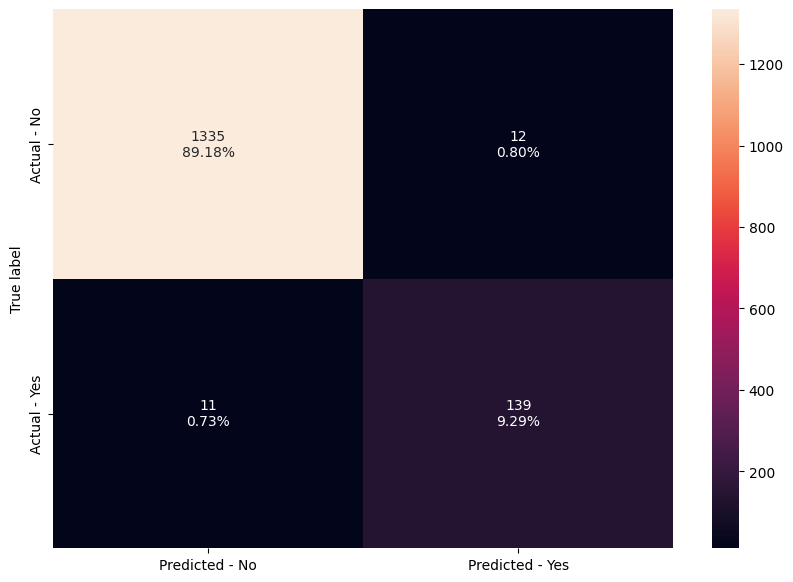

In [ ]:
make_confusion_matrix(dtree,y_test)

12 case are false positive and 11 are false negative

## Visualizing the Decision Tree

In [ ]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


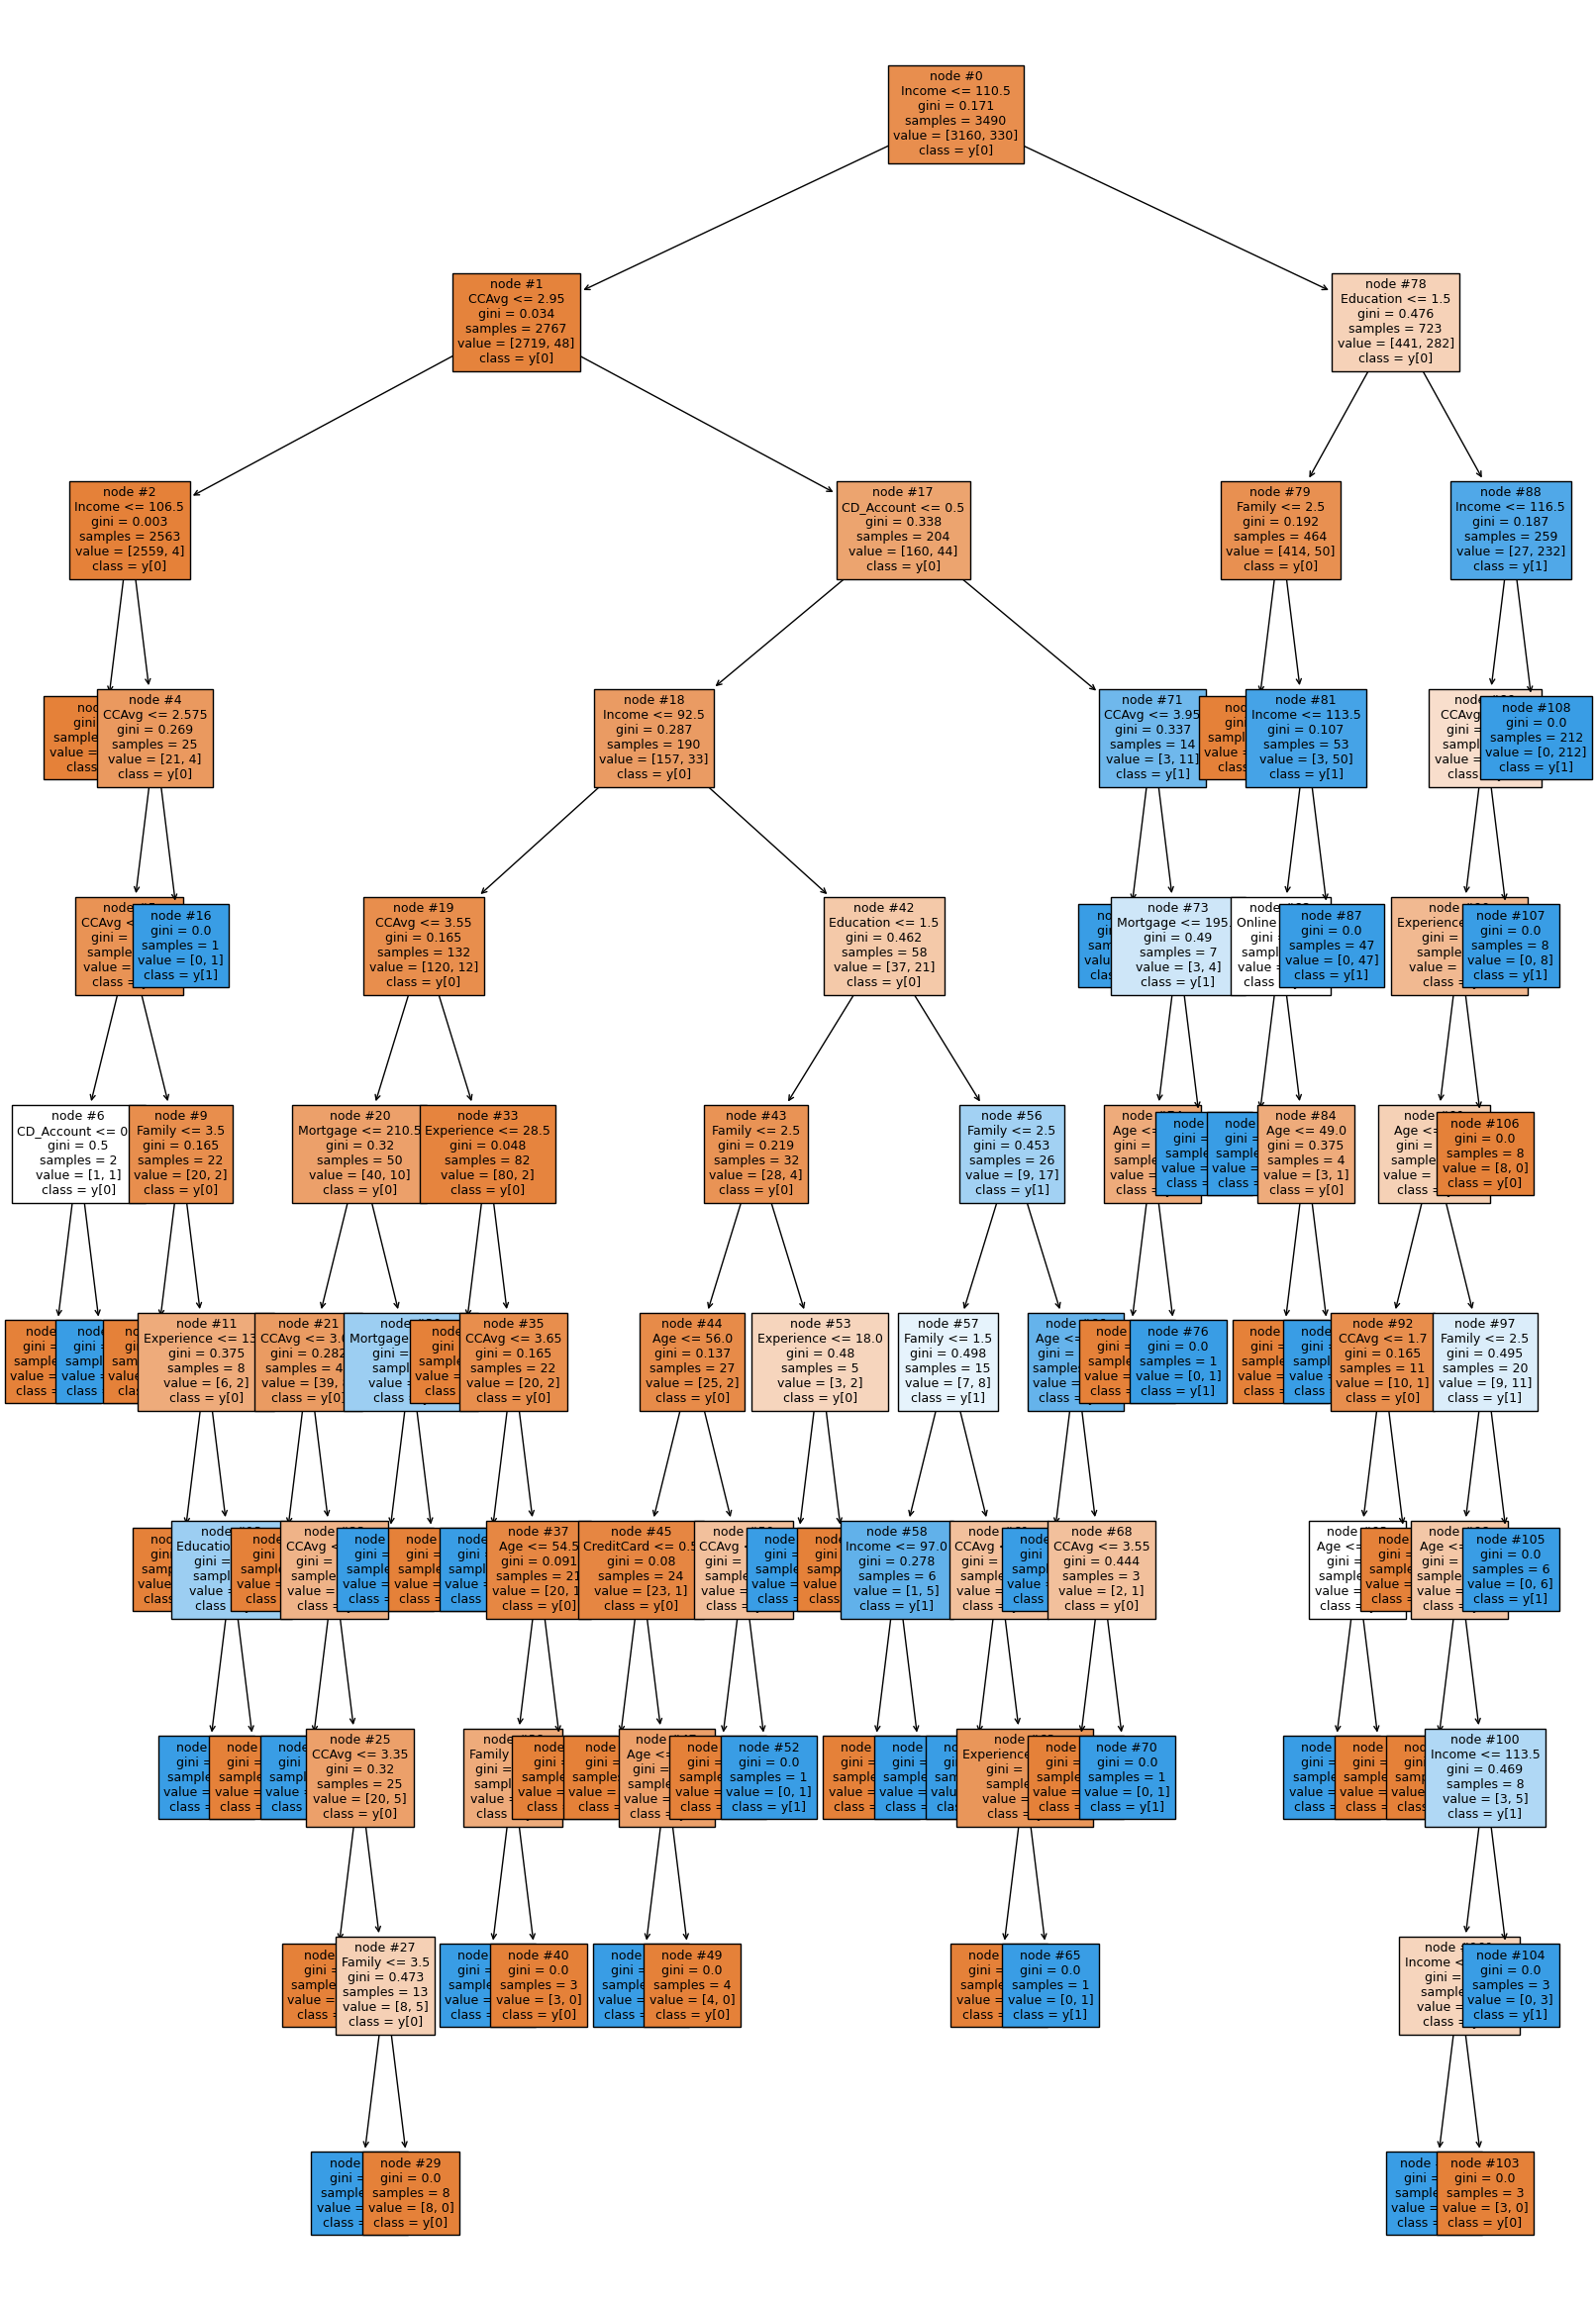

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(dtree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

The tree is very deep and has likely grown as much as possible, which suggests overfitting.
Note: The first split was on CCAvg(gini=0.034) and education(gini=0.476).

In [ ]:
# textual representation of our tree
print(tree.export_text(dtree,feature_names=feature_names,show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2538.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- CCAvg <= 2.58
|   |   |   |   |--- CCAvg <= 0.75
|   |   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- CCAvg >  0.75
|   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |--- Experience <= 13.00
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Experience >  13.00
|   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] cla

In [ ]:
# feature importances
print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.361080
Income              0.334515
Family              0.165751
CCAvg               0.072961
Age                 0.023541
CD_Account          0.018020
Experience          0.013308
Mortgage            0.007785
Online              0.002510
CreditCard          0.000530
Securities_Account  0.000000


the education , income and family are the most important features in this tree

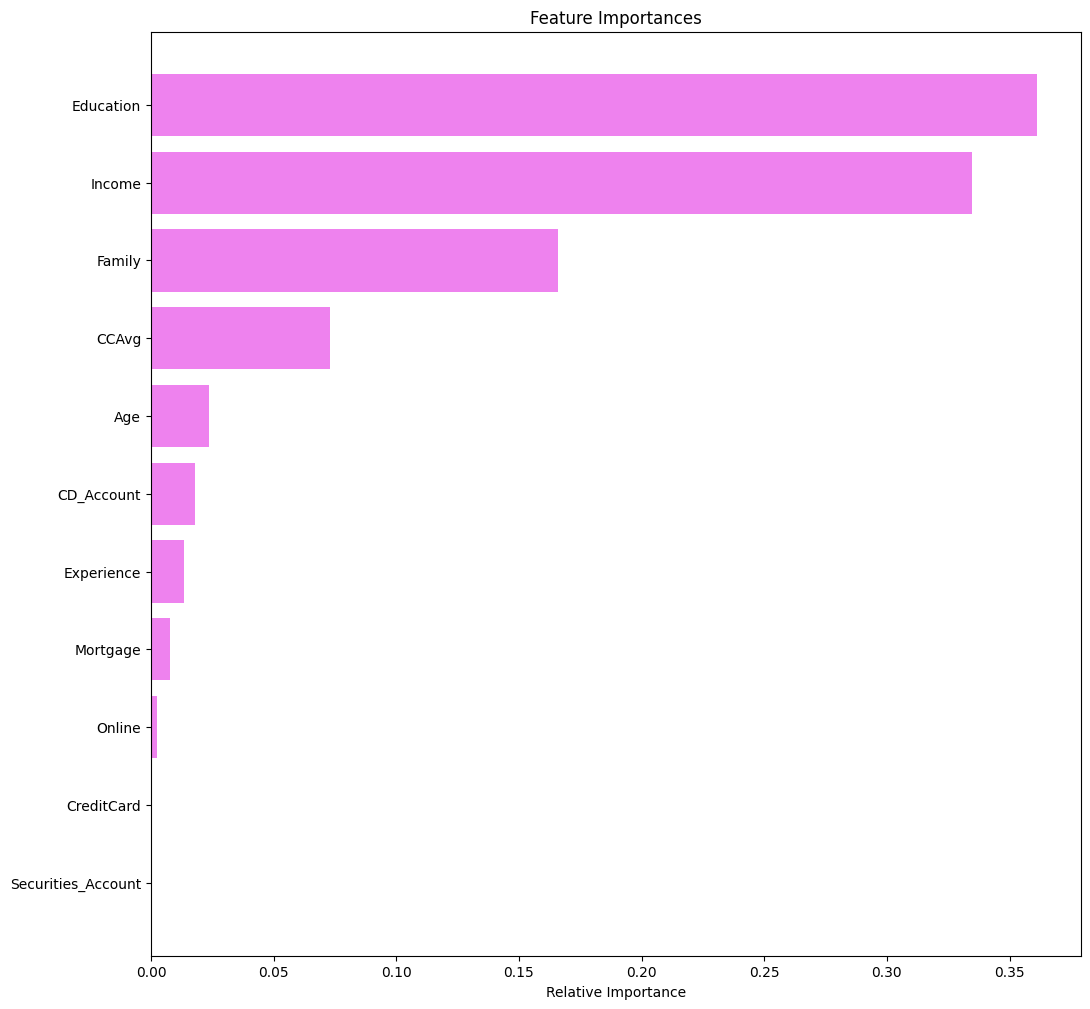

In [ ]:
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

we can suggest also the CCAvg as an importante feature too

## Reducing over fitting

## - 1- pre_pruning

I will perform cross-validation using both Gini and entropy impurity criteria to evaluate the model's performance. As mentioned earlier, the F1-score will be the primary metric for assessment.

In [ ]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'max_depth': np.arange(2, 20, 1),
    'min_samples_split': np.arange(2, 20, 1),
    'min_samples_leaf': np.arange(2, 20, 2),
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with precision scoring
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 5832 candidates, totalling 29160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='f1', verbose=2)

In [ ]:
# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation accuracy score: ", best_score)


Best parameters found:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 8}
Best cross-validation accuracy score:  0.9175937002911857


let's train anther decision tree using the best parameters

In this case, entropy appears to be a better criterion for splitting the variable compared to Gini. Even after exploring a wider range of hyperparameters, entropy remains the most effective choice.

In [ ]:
dtree1=DecisionTreeClassifier(criterion='entropy', max_depth= 4, min_samples_leaf= 2, min_samples_split= 8,random_state=1)
dtree1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=8, random_state=1)

In [ ]:
get_precision_recall_accuracy_f1_scores(dtree1, X_train, X_test, y_train, y_test)

Training set metrics:
Recall    :  0.8878787878787879
Precision :  0.9638157894736842
Accuracy  :  0.9862464183381089
F1 Score  :  0.9242902208201893

Test set metrics:
Recall    :  0.9066666666666666
Precision :  0.9645390070921985
Accuracy  :  0.9873079492317969
F1 Score  :  0.9347079037800686


the f1 score is adjusted to be 0.924 on the training set and 0.934 on test set .
While a lower recall means we might miss out on some potential loan customers, the increased precision ensures we target the right customers more effectively. This trade-off is particularly beneficial if the marketing campaign budget is limited.

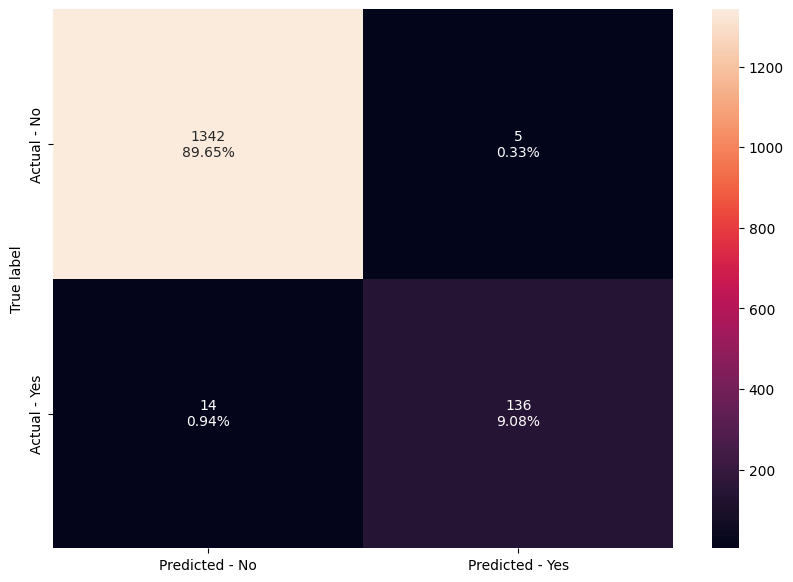

In [ ]:
make_confusion_matrix(dtree1,y_test)

The false positive rate has decreased to 5, but the false negative rate has increased to 14 (from 11).

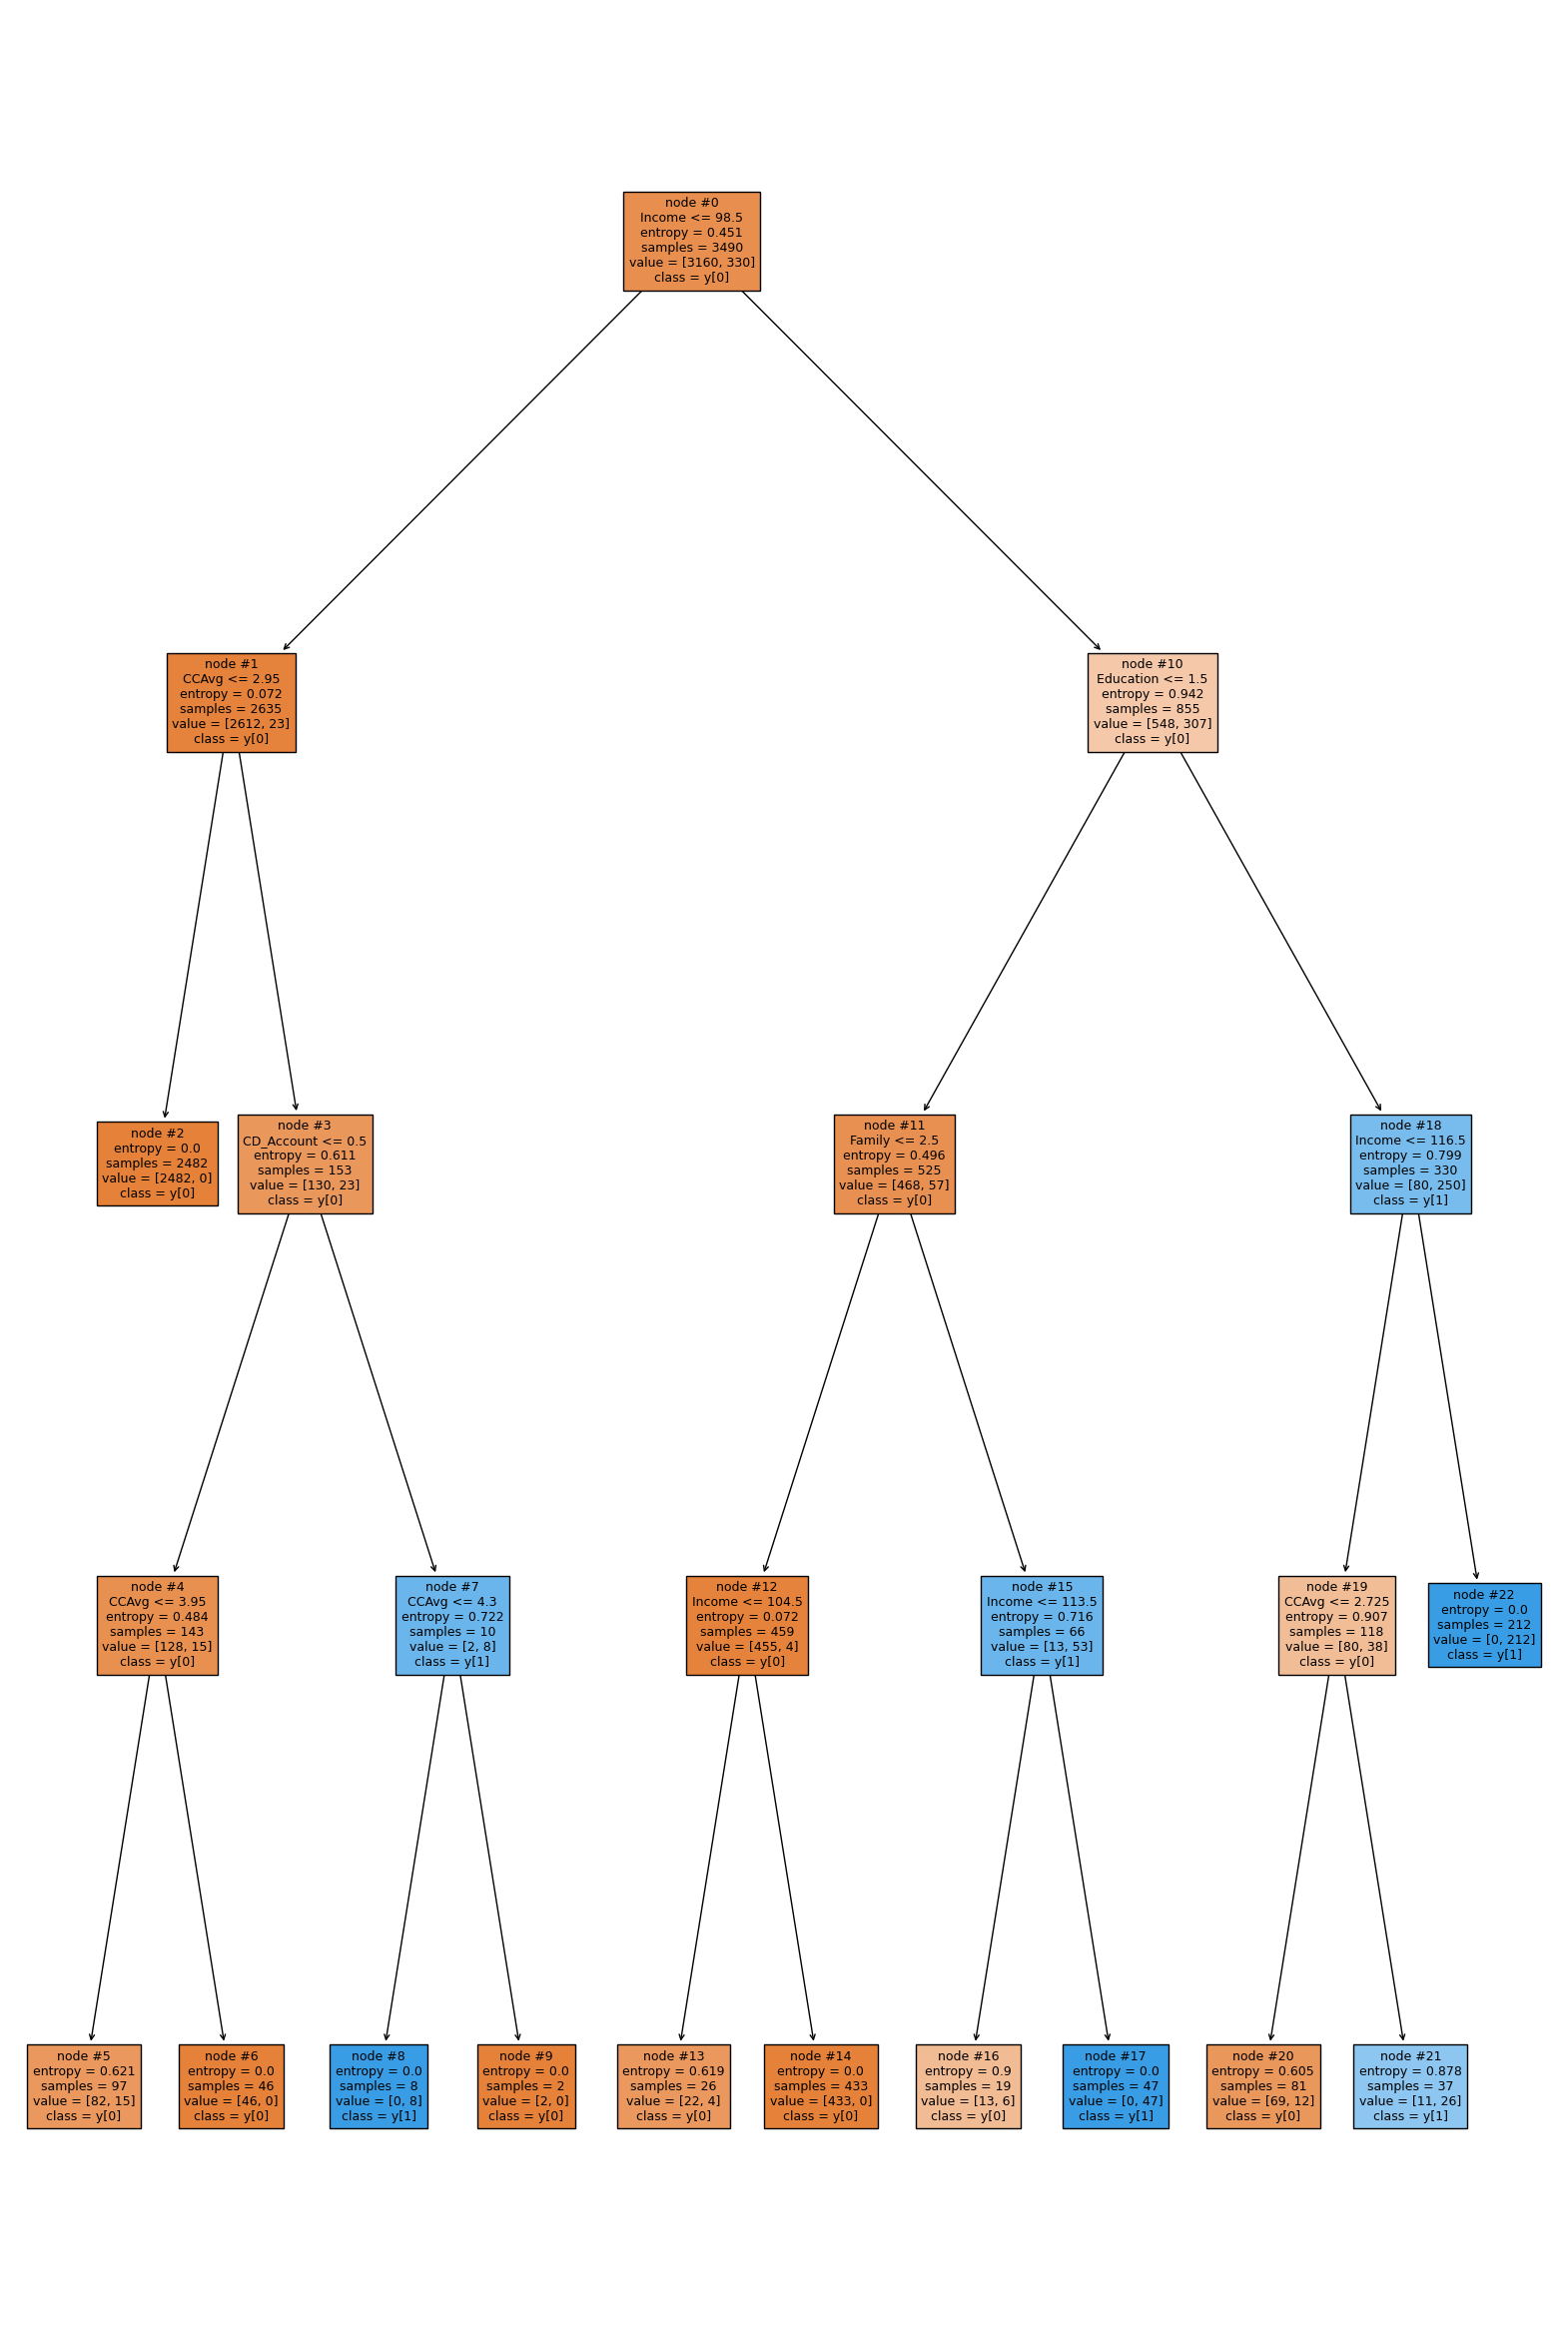

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(dtree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

The tree has now been pruned and appears to be more understandable.

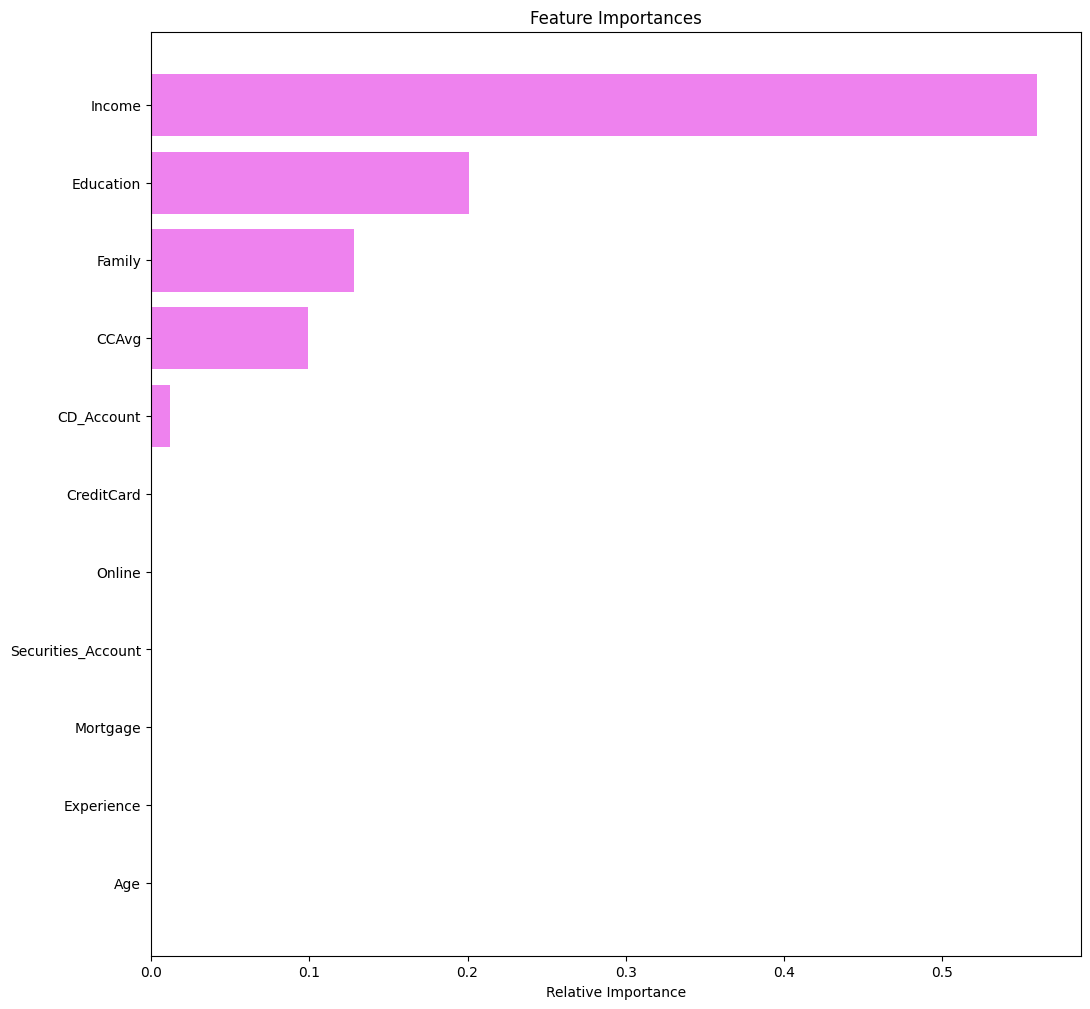

In [ ]:
importances = dtree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## -2- Post_Pruning or cost complexity pruning

- we want to find the right balance between tree complexity and predictive power, thereby enhancing the model's ability to generalize to new data.
- A higher value of ccp_alpha leads to more aggressive pruning, resulting in simpler trees with fewer nodes and smaller depth.

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
imp=impurities.tolist()

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000260,0.000521
2,0.000265,0.001582
3,0.000273,0.002128
4,0.000286,0.002700
5,0.000287,0.002987
6,0.000304,0.004205
7,0.000382,0.004587
8,0.000382,0.004969
9,0.000392,0.005753


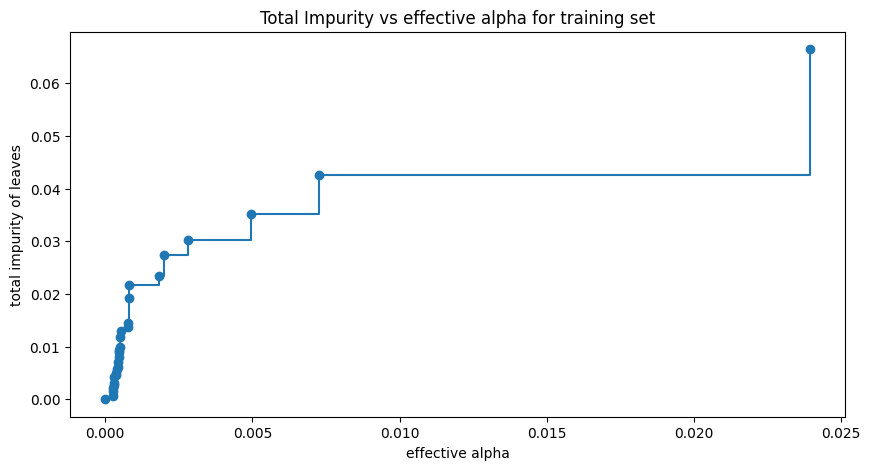

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

let's find the perfect ccp_alpha using the same parameter before and using search grid

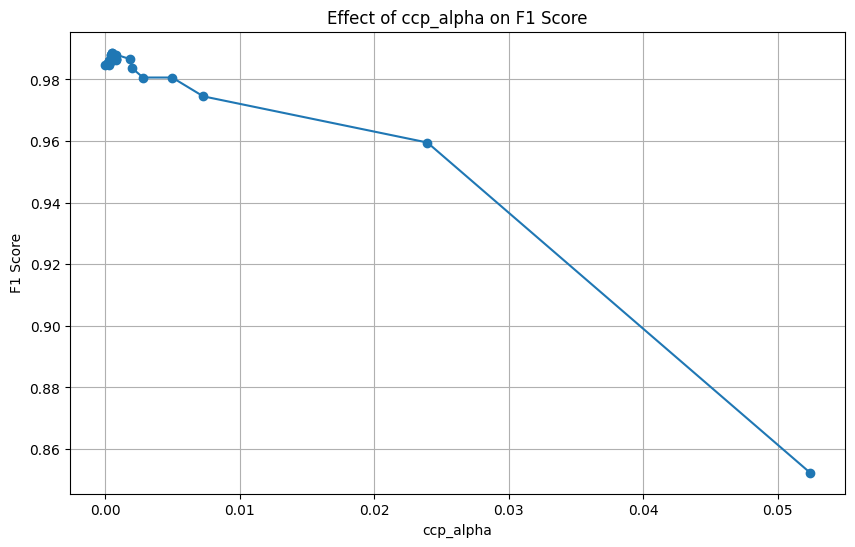

In [ ]:
from sklearn.metrics import f1_score

f1_scores = []

# Train a tree for each alpha value and evaluate the F1 score
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    f1_scores.append(f1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, f1_scores, marker='o', linestyle='-')
plt.xlabel('ccp_alpha')
plt.ylabel('F1 Score')
plt.title('Effect of ccp_alpha on F1 Score')
plt.grid(True)
plt.show()

The figure illustrates that as the ccp_alpha value increases, the F1-score tends to decrease.

In [ ]:
param_grid1= {
    'ccp_alpha': imp }
grid_search1 = GridSearchCV(estimator=dtree, param_grid=param_grid1, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search1.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.0005209690023443605,
                                       0.001582202155268058,
                                       0.0021279792053431022,
                                       0.002700379526153515,
                                       0.0029869124774429133,
                                       0.004204677520422856,
                                       0.004586721455475388,
                                       0.004968765390527919,
                                       0.00575315353702974,
                                       0.006182952963963837,
                                       0.0070425518178320315,
                                       0.00796355...0890804809593576,
                                       0.009385603014751423,
                                       0.009876802359818963,
                                       0.011898276587596915,
                                       0.012972775154932158,
                                       0.013735060931003953,
                                       0.014502559907671984,
                                       0.019253966629866323,
                                       0.021651855274173307,
                                       0.023475161517402737,
                                       0.027472132725955906,
                                       0.03027112413672622, 0.03523603416550954,
                                       0.042511659657315, 0.06645543059500666,
                                       0.17123012126337223]},
             scoring='f1', verbose=2)

In [ ]:
# Best parameters and best score
best_params1 = grid_search1.best_params_
best_score1 = grid_search1.best_score_

print("Best parameters found: ", best_params1)
print("Best cross-validation accuracy score: ", best_score1)

Best parameters found:  {'ccp_alpha': 0.001582202155268058}
Best cross-validation accuracy score:  0.9072451957491326


when it came to the f1 score it look less that what we find using the pre pruning.
we must remember here that the critiron is gini

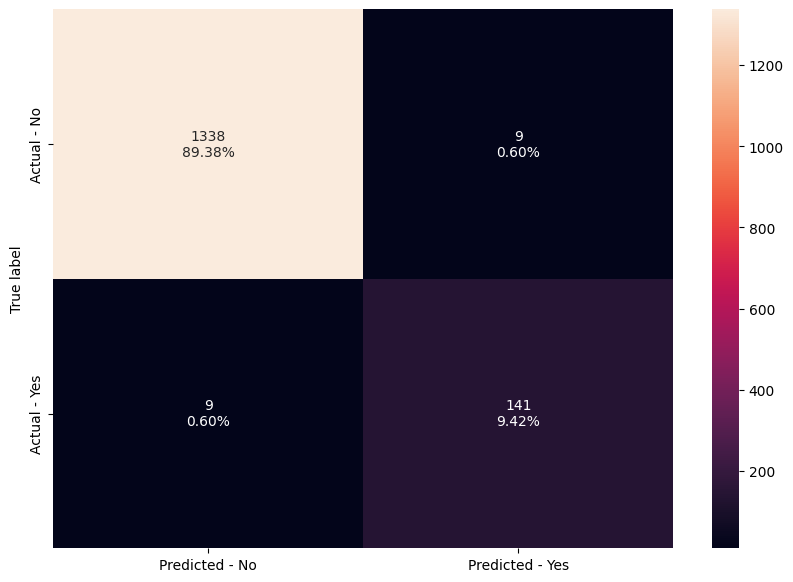

In [ ]:
make_confusion_matrix(grid_search1.best_estimator_,y_test)

 the model seems to be good in comparision with the previous result using the pre_pruning when the false negative was 11

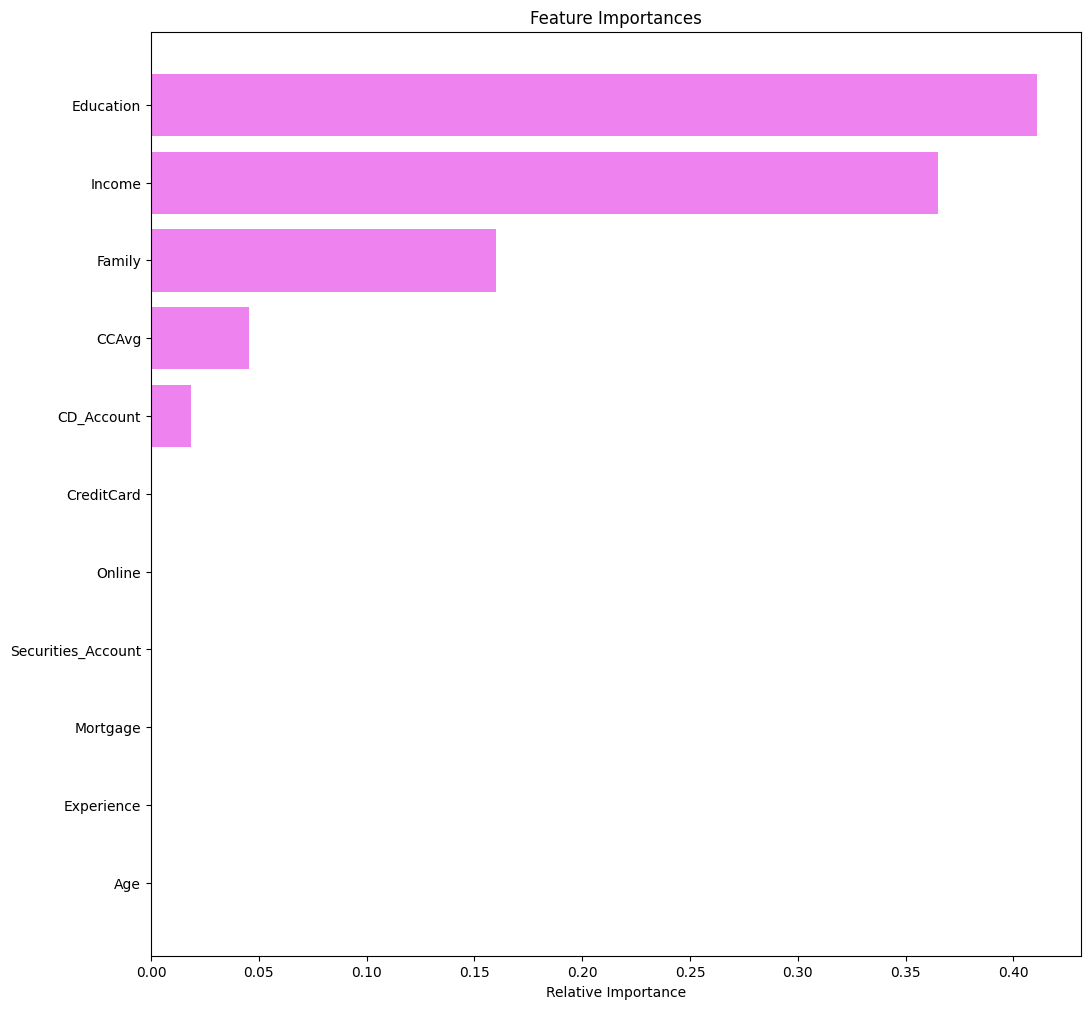

In [ ]:
importances = grid_search1.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

the feature importante keep the same

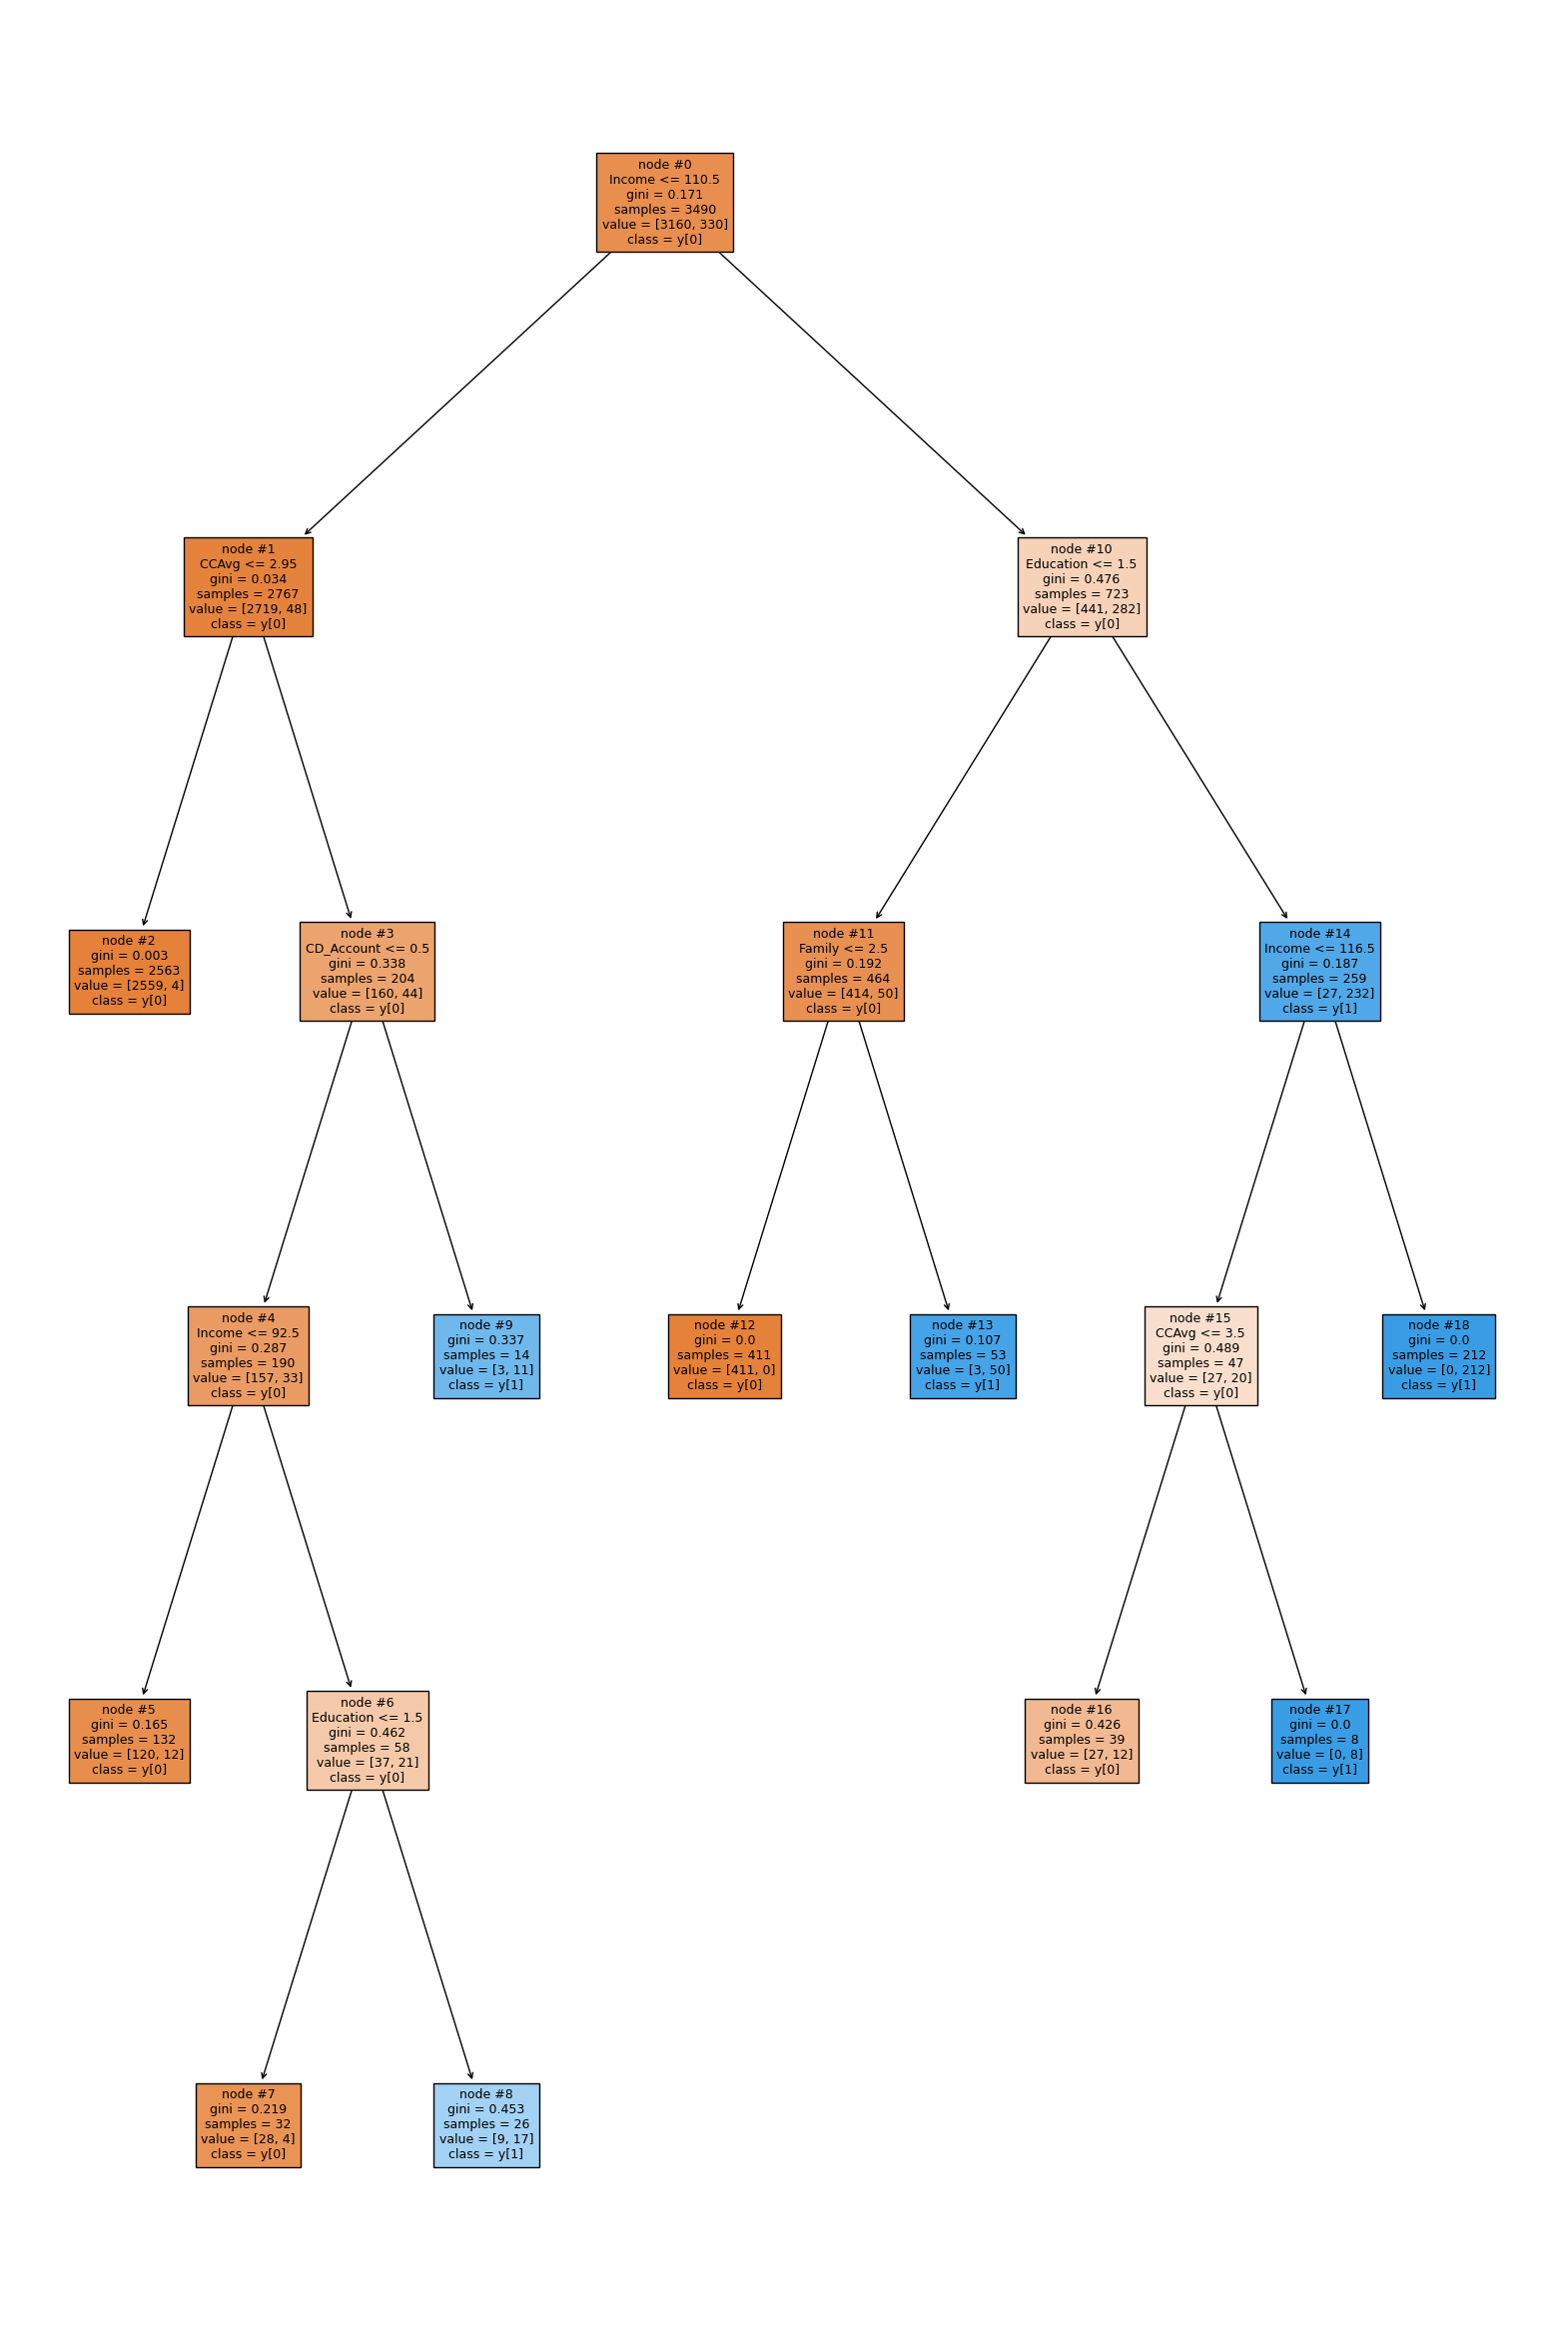

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(grid_search1.best_estimator_,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

The tree appears to be more pruned than the pre-pruned tree.

In [ ]:
get_precision_recall_accuracy_f1_scores(grid_search1.best_estimator_, X_train, X_test, y_train, y_test)

Training set metrics:
Recall    :  0.8878787878787879
Precision :  0.9638157894736842
Accuracy  :  0.9862464183381089
F1 Score  :  0.9242902208201893

Test set metrics:
Recall    :  0.9066666666666666
Precision :  0.9645390070921985
Accuracy  :  0.9873079492317969
F1 Score  :  0.9347079037800686


let's change the critirion to entropy

In [ ]:
dtree3=DecisionTreeClassifier(criterion='entropy', random_state=1)
dtree3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
param_grid2= {
    'ccp_alpha': imp }
grid_search2 = GridSearchCV(estimator=dtree3, param_grid=param_grid1, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.0005209690023443605,
                                       0.001582202155268058,
                                       0.0021279792053431022,
                                       0.002700379526153515,
                                       0.0029869124774429133,
                                       0.004204677520422856,
                                       0.004586721455475388,
                                       0.004968765390527919,
                                       0.00575315353702974,
                                       0.006182952963963837,
                                       0.0070425518...
                                       0.00796355058983367, 0.00890804809593576,
                                       0.009385603014751423,
                                       0.009876802359818963,
                                       0.011898276587596915,
                                       0.012972775154932158,
                                       0.013735060931003953,
                                       0.014502559907671984,
                                       0.019253966629866323,
                                       0.021651855274173307,
                                       0.023475161517402737,
                                       0.027472132725955906,
                                       0.03027112413672622, 0.03523603416550954,
                                       0.042511659657315, 0.06645543059500666,
                                       0.17123012126337223]},
             scoring='f1', verbose=2)

In [ ]:
# Best parameters and best score
best_params2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_

print("Best parameters found: ", best_params2)
print("Best cross-validation accuracy score: ", best_score2)

Best parameters found:  {'ccp_alpha': 0.002700379526153515}
Best cross-validation accuracy score:  0.9178417161642016


the cost complexity changed and the f1 score also

In [ ]:
get_precision_recall_accuracy_f1_scores(grid_search2.best_estimator_,X_train,X_test,y_train,y_test)

Training set metrics:
Recall    :  0.8878787878787879
Precision :  0.9575163398692811
Accuracy  :  0.9856733524355301
F1 Score  :  0.9213836477987423

Test set metrics:
Recall    :  0.9133333333333333
Precision :  0.958041958041958
Accuracy  :  0.9873079492317969
F1 Score  :  0.9351535836177474


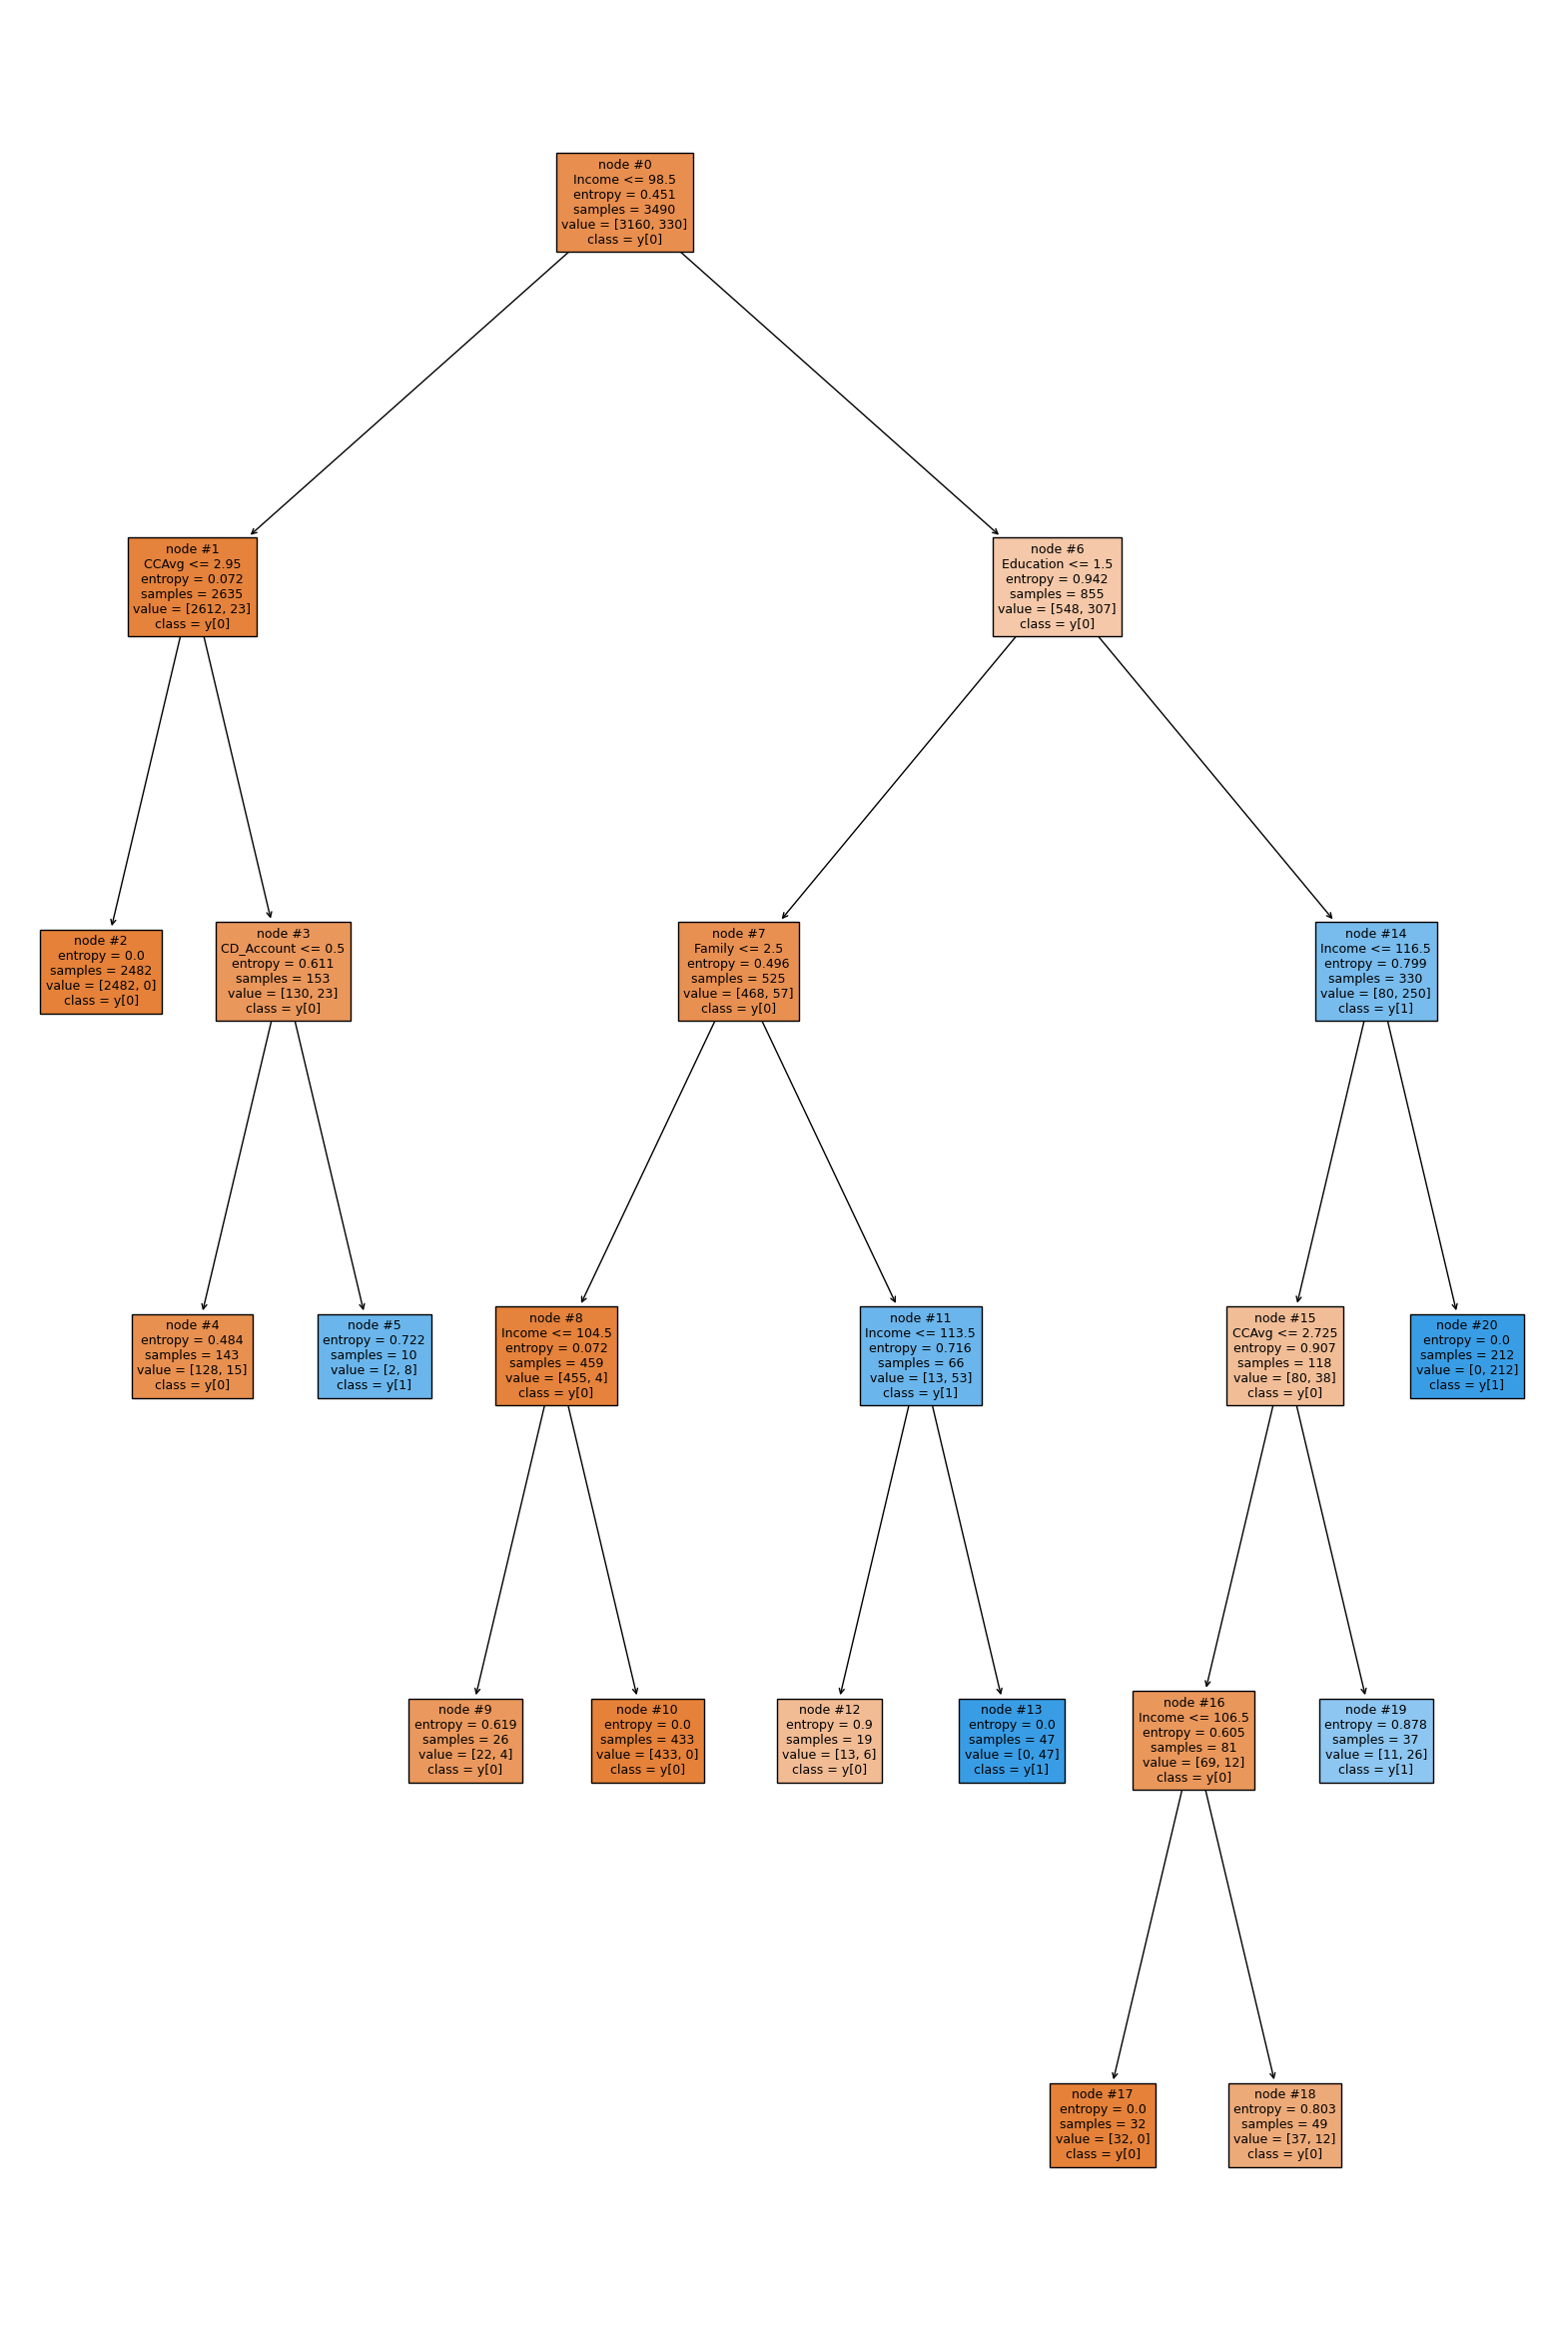

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(grid_search2.best_estimator_,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

the pruning is changed too

## conclusion about the model :
- Post_pruning appears slightly to be effective technique for addressing overfitting in this case. The model achieved a high F1-score of nearly 0.935 on the test set.
- While the current model reduces false positives, it also comes at the cost of a lower recall rate. If minimizing false negatives is a higher priority, we can retrain the model by adjusting the scoring metric to emphasize recall.
- the most importante features are educations , familly and CCAvg and less CD_Account

Let's evaluate my final model's performance using metrics like ROC_AUC

ROC AUC score: 0.9967706013363028


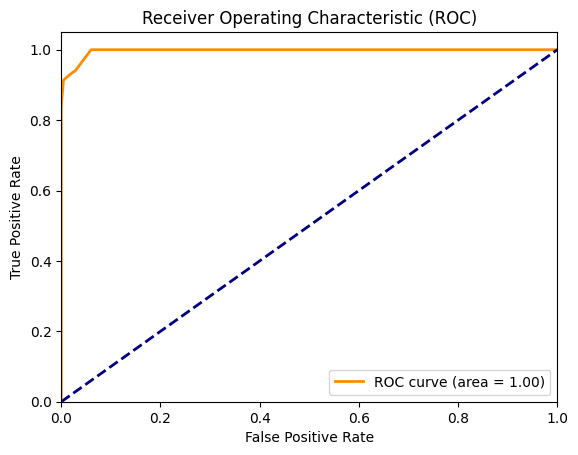

In [ ]:
y_prob = grid_search2.best_estimator_.predict_proba(X_test)[:, 1]  # We need the probability for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC score:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

this courve indicates excellent performance in distinguishing between the positive and negative classes.

## Model Comparison and Final Model Selection

In [ ]:
dtree4=DecisionTreeClassifier(criterion='entropy',ccp_alpha= 0.002700379526153515, random_state=1)
dtree4.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.002700379526153515, criterion='entropy',
                       random_state=1)

In [ ]:
get_precision_recall_accuracy_f1_scores(dtree4,X_train,X_test,y_train,y_test)

Training set metrics:
Recall    :  0.8878787878787879
Precision :  0.9575163398692811
Accuracy  :  0.9856733524355301
F1 Score  :  0.9213836477987423

Test set metrics:
Recall    :  0.9133333333333333
Precision :  0.958041958041958
Accuracy  :  0.9873079492317969
F1 Score  :  0.9351535836177474


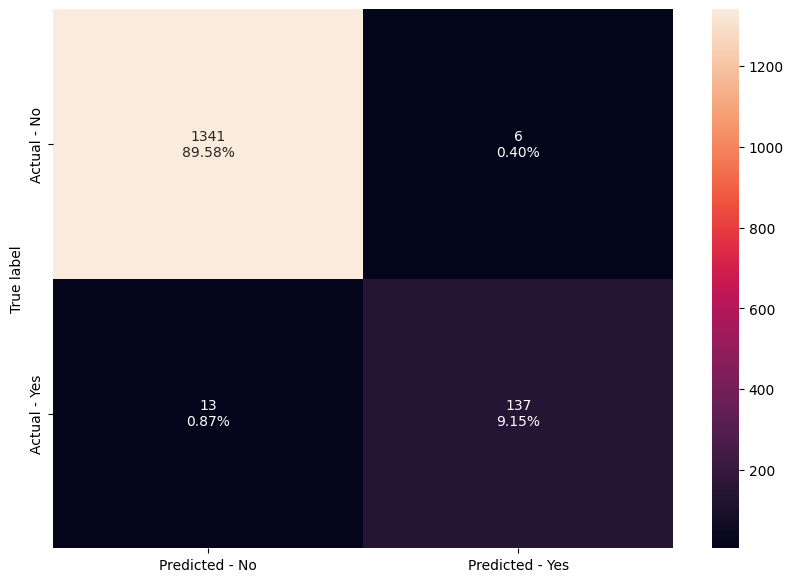

In [ ]:
make_confusion_matrix(dtree4,y_test)

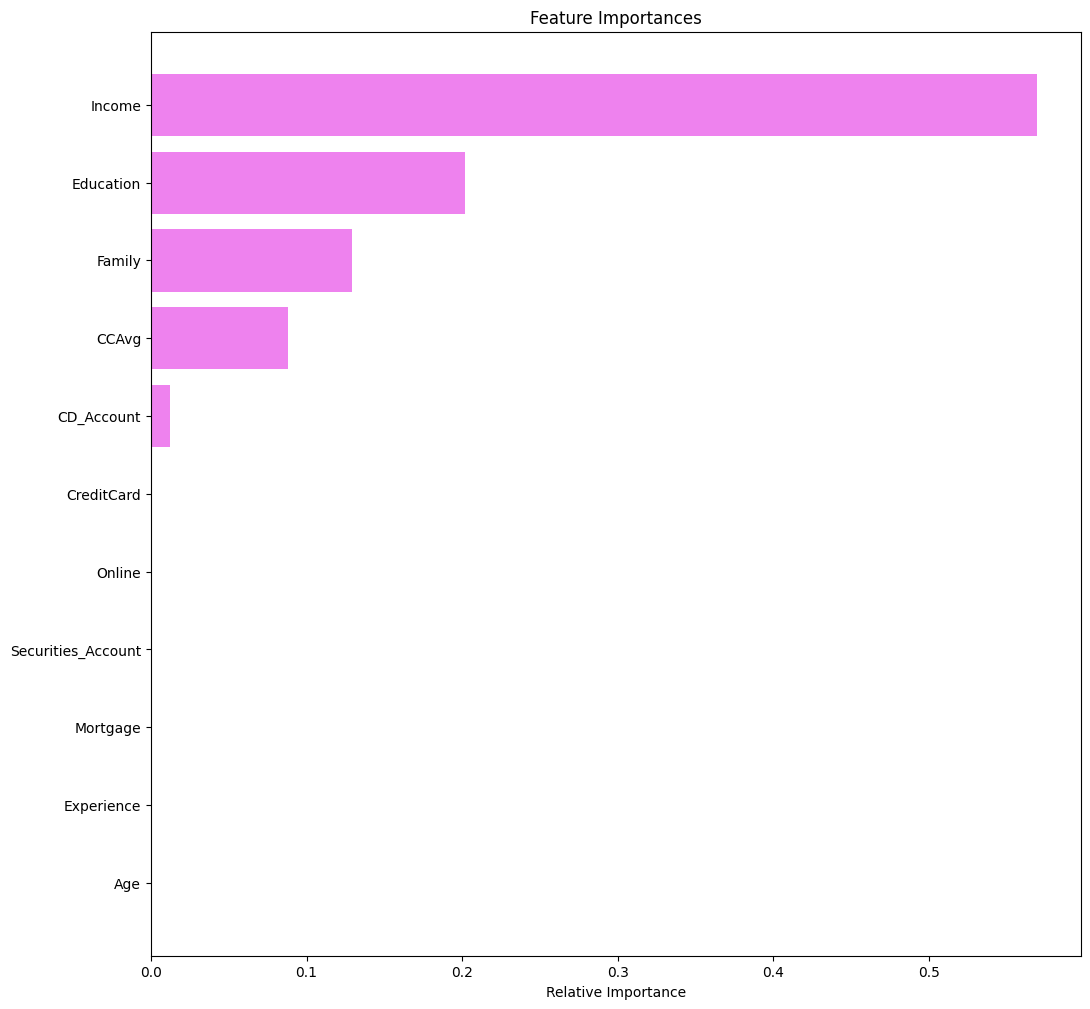

In [ ]:
importances = dtree4.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

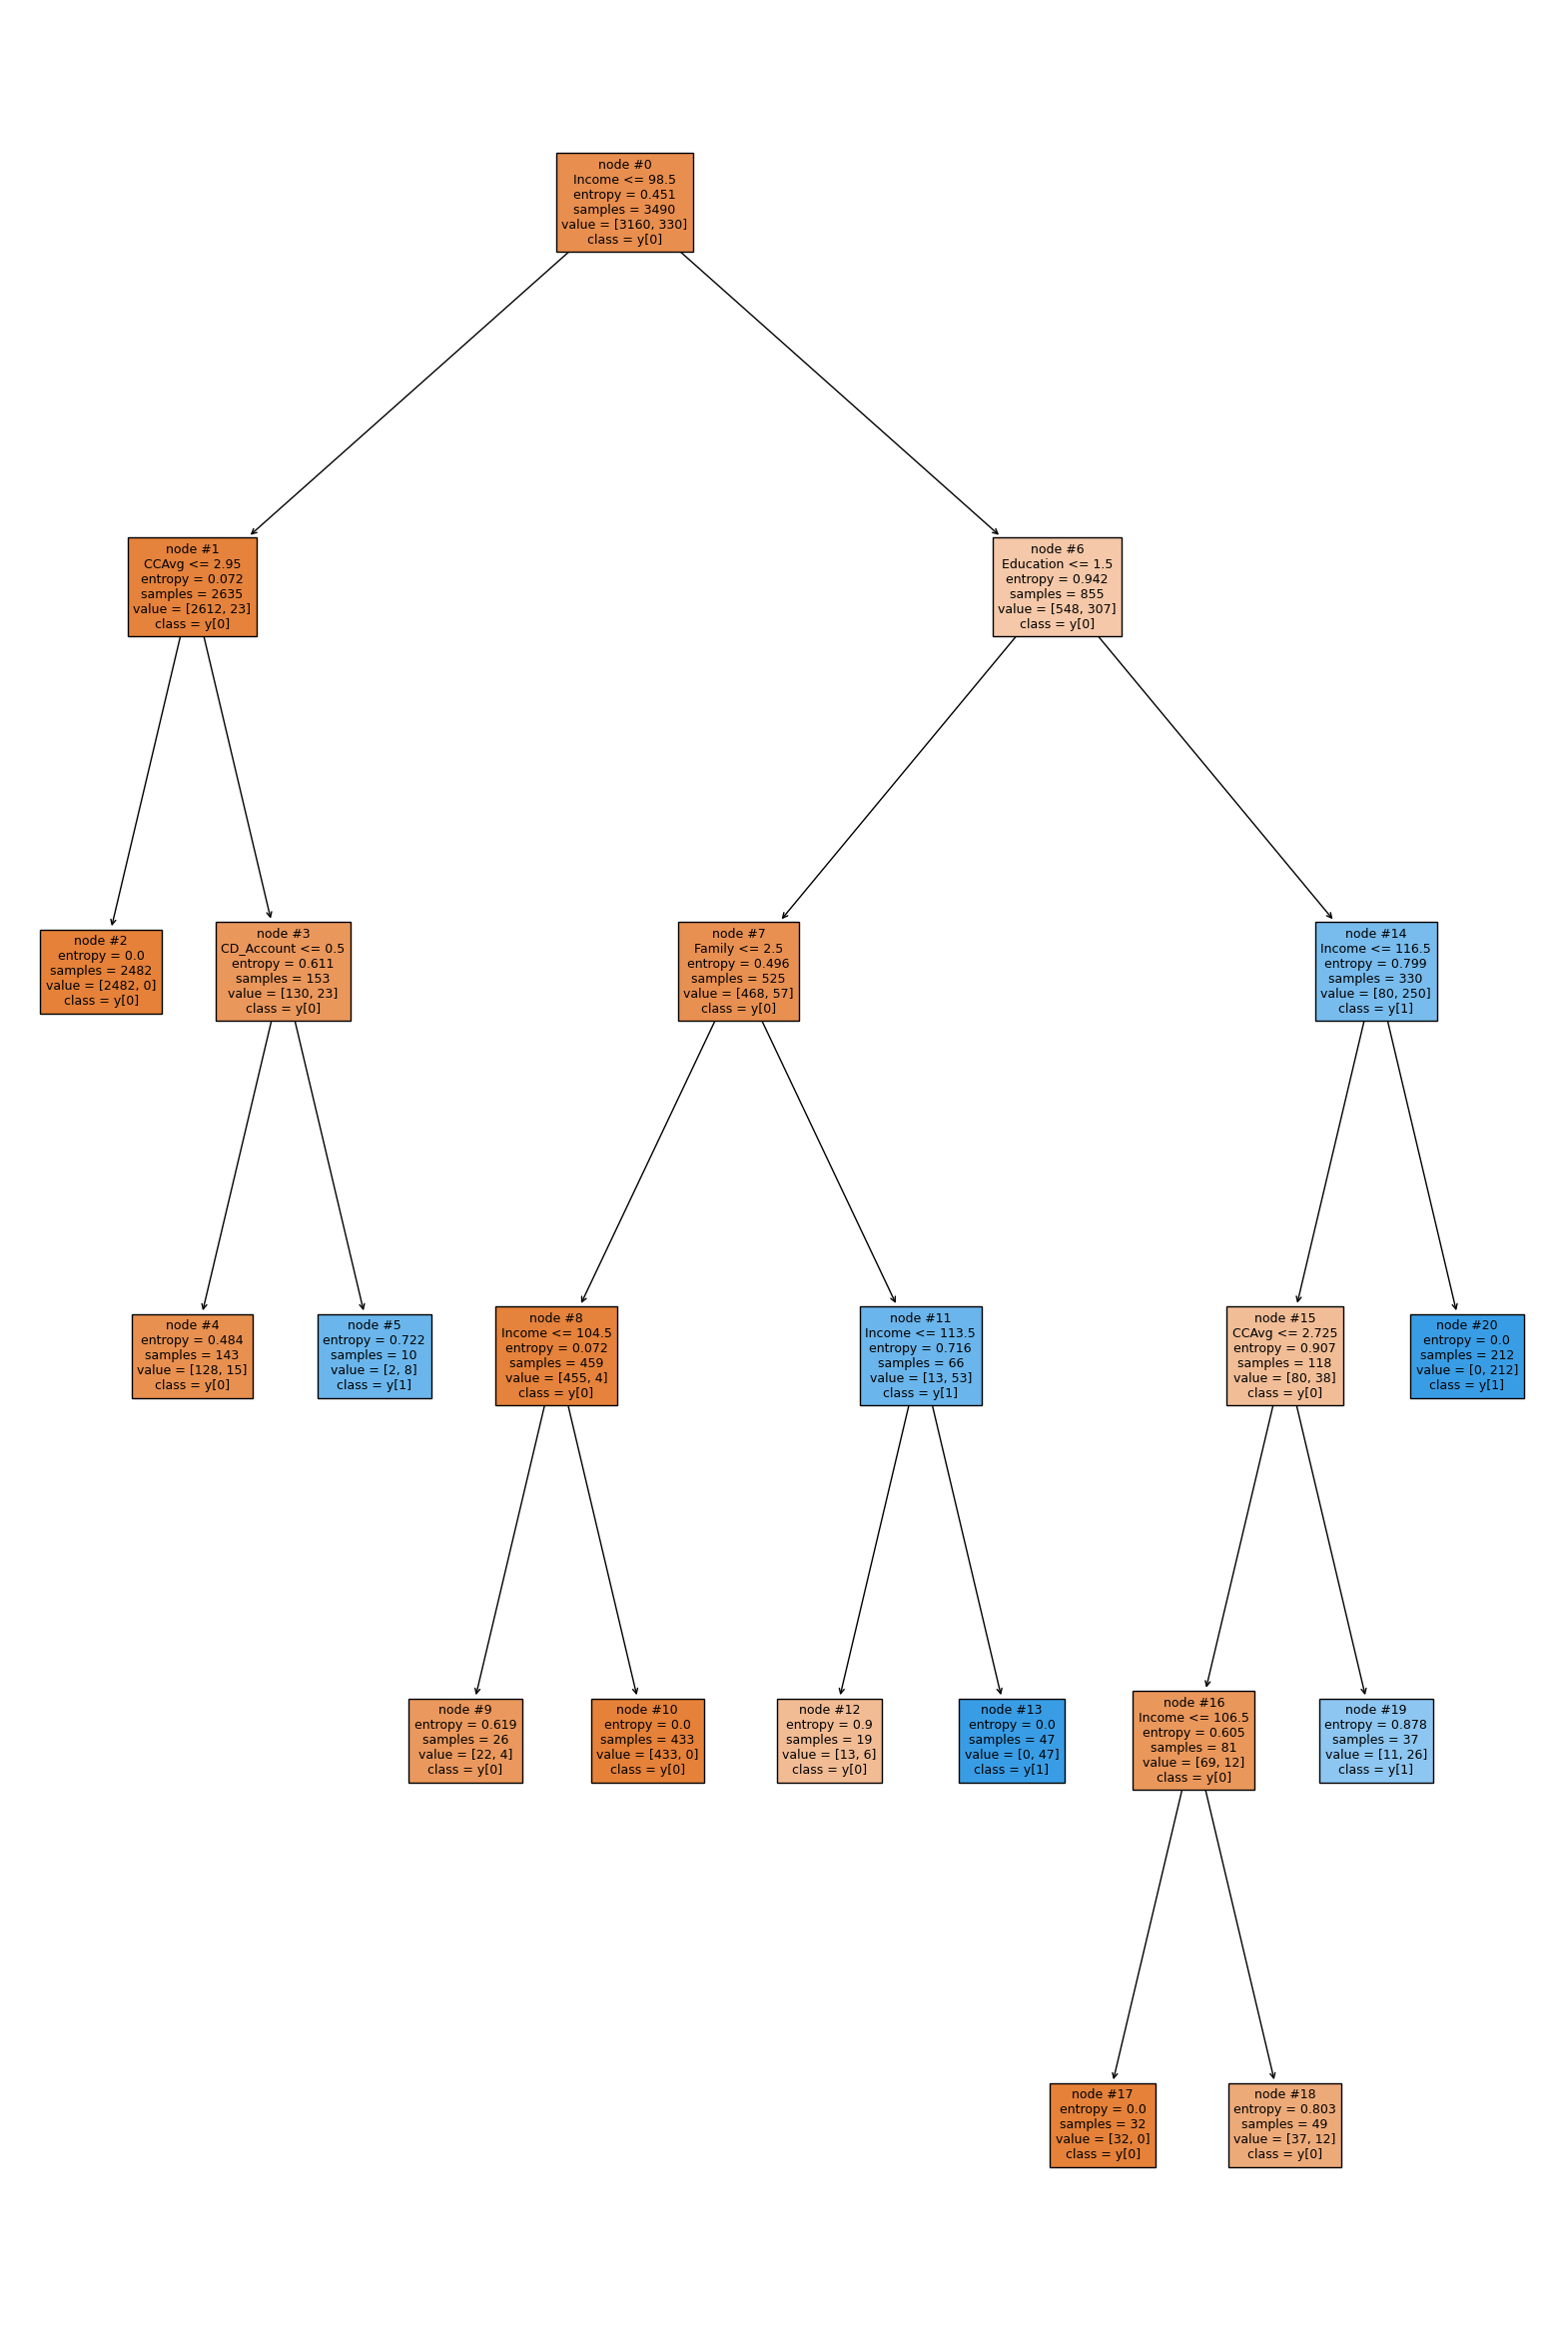

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(dtree4,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

## Actionable Insights and Business Recommendations


The marketing campaign should prioritize this strategic plan that outlines
actions and messaging to target various customer segments effectively.

- For high-income customers, we suggest segmenting these individuals, offering personalized loan products, and introducing exclusive financial services.
- For customers with higher education levels, we recommend creating educational campaigns and offering education-based incentives.
- To engage families, we propose developing family-oriented loan products and highlighting the benefits of financial stability.
- We also emphasize leveraging high credit card spending for cross-selling opportunities by offering rewards and incentives.
- Lastly, we can focuse on promoting Certificate of Deposit (CD) accounts through educational initiatives and offering incentives for opening CD accounts.
- Finaly ,the messaging should be tailored to each segment to enhance customer engagement and satisfaction.

___